# synthe_size_me_v2
# SDG Masters Project
Stacking and augmenting synthetic data

In [2]:
# Imports

from synthesizers import Load
from syntheval import SynthEval

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [87]:
# Load penguin_data and split it into train and test 80/20

penguins_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

# Drop NaN values
penguins_real = penguins_real.dropna()

# Split the data into train and test
p_train, p_test = train_test_split(penguins_real, train_size=0.8, random_state=42)

# Save the train and test data
p_train.to_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv", index=False)
p_test.to_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv", index=False)

# Baseline train/test split
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")

target = 'species'


# Training and stacking synthesized penguin_data using ctgan model

Train and generation of ctgan_syn_v1

In [88]:
# Count shape of penguins_train for gen_count
gen_count = penguins_real.shape[0]

# Synthesize data with synthesizers
Load(penguins_train).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v1.csv", key="synth")

[2024-04-29T12:04:19.731669+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 20%|█▉        | 399/2000 [00:46<03:06,  8.56it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

Quick eval of ctgan_syn_v1 penguins

In [53]:
# Read syn data
penguins_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v1.csv").round(1)

# Remove first col
penguins_fake = penguins_fake.iloc[:, 1:]

S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_base = S.evaluate(penguins_fake,target,"full_eval")
res_base

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.038764  0.009259  0.961236  0.009259
1    pca_eigval_diff   u  0.056347       NaN  0.943653       NaN
2     pca_eigvec_ang   u  0.065386       NaN  0.979187       NaN
3            avg_cio   u  0.258618  0.171464  0.258618  0.171464
4      corr_mat_diff   u  0.510340       NaN  0.975698       NaN
5    mutual_inf_diff   u  0.629546       NaN  0.970022       NaN
6        ks_tvd_stat   u  0.101006  0.020528  0.898994  0.020528
7       frac_ks_sigs   u  0.571429       NaN  0.428571       NaN
8         avg_h_dist   u  0.115554  0.093073  0.884446  0.093073
9           avg_pMSE   u  0.024352  0.002141  0.902590  0.008564
10          avg_nndr   p  0.814650  0.009149  0.814650  0.009149
11    priv_loss_nndr   p  0.006323  0.019875  0.993677  0.009149
12              nnaa   u  0.774238  0.000000  0.225762  0.000000
13    priv_loss_nnaa   p -0.114537  0.007382  0.885463  0.007382
14       cls_F1_diff   u  0.075105  0.014956  0.924895  0.014956
15  cls_F1_diff_hout   u  0.078358  0.031881  0.921642  0.031881
16        median_DCR   p  1.553027       NaN  0.914284       NaN
17          hit_rate   p  0.037453       NaN  0.962547       NaN
18  eps_identif_risk   p  0.235955       NaN  0.764045       NaN
19      mia_cls_risk   p  0.958824  0.011765  0.041176  0.011765
20    att_discl_risk   p  0.480325  0.129937  0.519675  0.129937

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:02<00:01,  4.40it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0388  0.0093   |
| PCA difference in eigenvalues (exp. var.):   0.0563           |
| PCA angle between eigenvectors (radians) :   0.0654           |
| Average confidence interval overlap      :   0.2586  0.1715   |
|   -> # non-overlapping COIs at 95%       :    2               |
|   -> fraction of non-overlapping CIs     :   0.5000           |
| Mixed correlation matrix difference      :   0.5103           |
| Pairwise mutual information difference   :   0.6295           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1010  0.0205   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1290  0.0224   |
|       -> avg. Total Variation Distance   :   0.0637  0.0270   |
|   -> average combined p-val

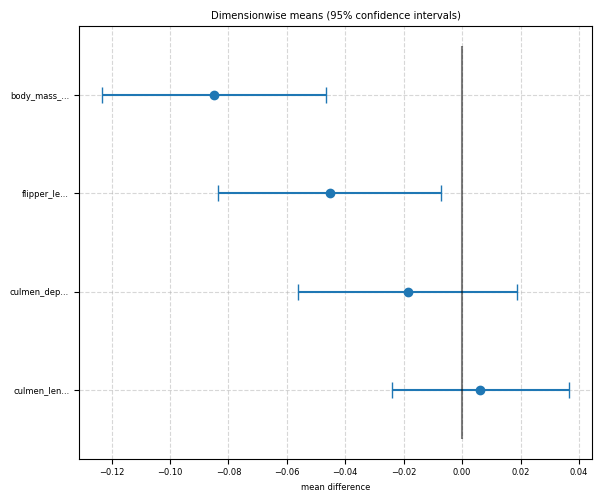

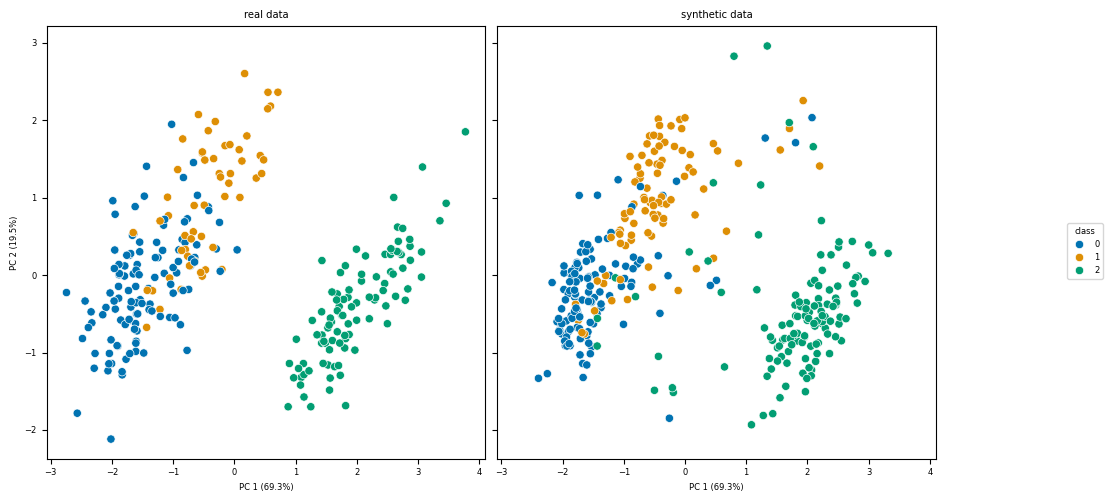

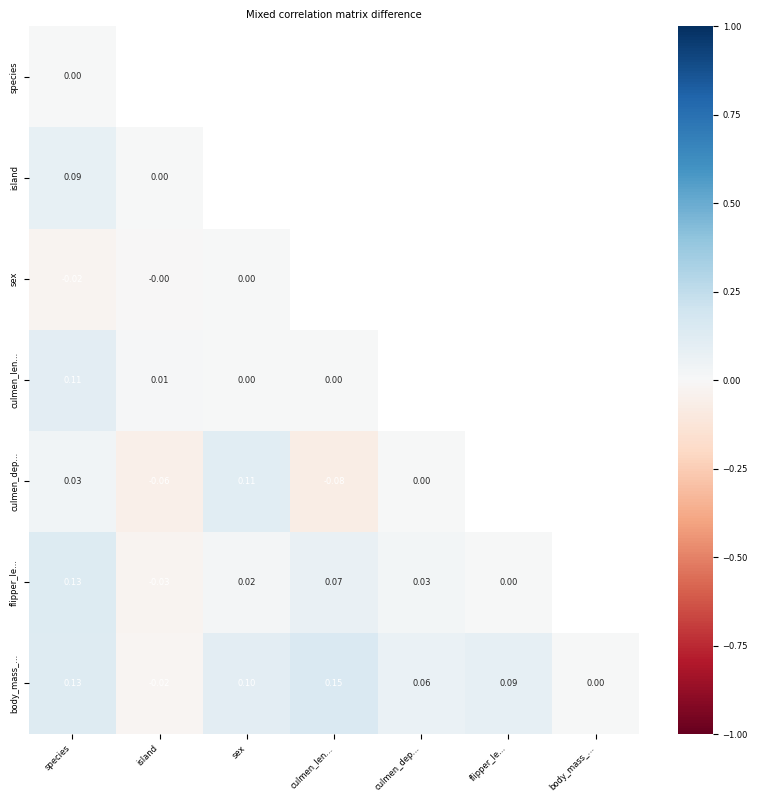

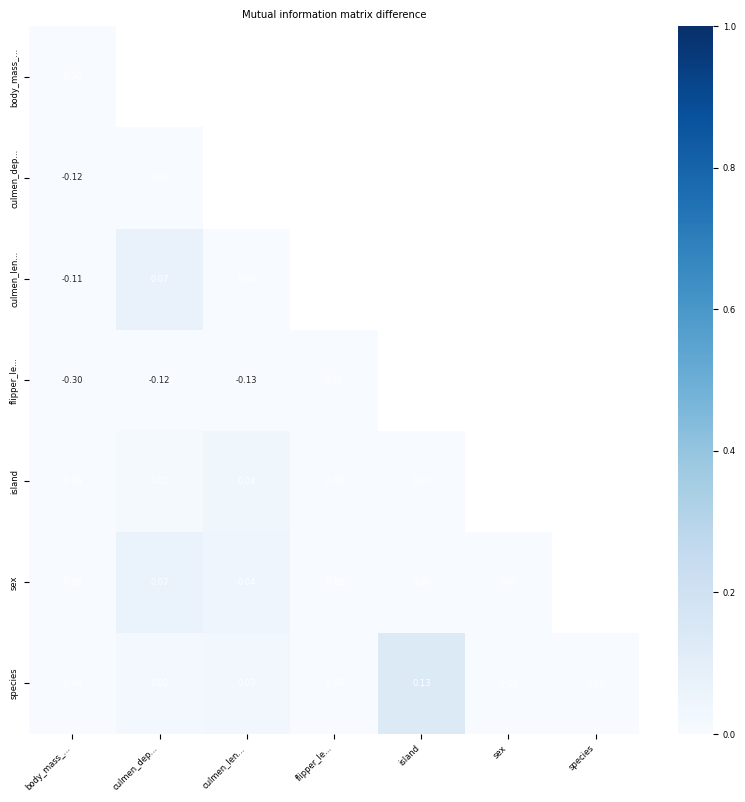

In [90]:
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(penguins_fake,target,"full_eval")

Stacking penguins_real with penguins_fake into ctgan_stack_v1

In [91]:
# Concat real and fake data
combined_df = pd.concat([penguins_real, penguins_fake], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v1.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v1 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v1.csv")
gen_count = penguins_ctgan_stack_v1.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v1, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v1.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v1.csv", index=False)


In [54]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v1 = pd.read_csv("penguins_train_ctgan_stacked_v1.csv")
penguins_test_ctgan_stack_v1 = pd.read_csv("penguins_test_ctgan_stacked_v1.csv")

Training on ctgan_stack_v1 and generation of ctgan_syn_v2

In [93]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v1).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v2.csv", key="synth")


[2024-04-29T12:05:15.105305+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 22%|██▏       | 449/2000 [01:27<05:02,  5.13it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              45.1             14.5   
1       Gentoo     Biscoe              46.9             14.1   
2    Chinstrap      Dream              50.8             20.0   
3       Adelie     Biscoe              41.1             19.1   
4       Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
529     Adelie  Torgersen              37.2             19.4   
530     Adelie     Biscoe              39.7             17.7   
531     Gentoo     Biscoe              45.5             15.0   
532  Chinstrap      Dream              47.3             18.3   
533     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                215.0       5000.0  FEMALE  
1                225.5       5733.6  FEMALE  
2                200.3       4246.9    MALE  
3                188.0       4100.0 

Eval of ctgan_syn_v2

In [55]:
# Read syn data
penguins_ctgan_syn_v2 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v2.csv").round(1)

# Remove first col
penguins_ctgan_syn_v2 = penguins_ctgan_syn_v2.iloc[:, 1:]


In [57]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v1, holdout_dataframe=penguins_test_ctgan_stack_v1, verbose=0)
res_stack_v1 = S.evaluate(penguins_ctgan_syn_v2,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.053081  0.006752  0.946919  0.006752
1    pca_eigval_diff   u  0.005783       NaN  0.994217       NaN
2     pca_eigvec_ang   u  0.023803       NaN  0.992423       NaN
3            avg_cio   u  0.206659  0.206659  0.206659  0.206659
4      corr_mat_diff   u  0.452957       NaN  0.978431       NaN
5    mutual_inf_diff   u  0.207914       NaN  0.990099       NaN
6        ks_tvd_stat   u  0.115405  0.026001  0.884595  0.026001
7       frac_ks_sigs   u  0.571429       NaN  0.428571       NaN
8         avg_h_dist   u  0.019920  0.011185  0.980080  0.011185
9           avg_pMSE   u  0.055221  0.003039  0.779118  0.012156
10          avg_nndr   p  0.815988  0.006924  0.815988  0.006924
11    priv_loss_nndr   p -0.000350  0.015269  0.999650  0.006924
12              nnaa   u  0.724621  0.000000  0.275379  0.000000
13    priv_loss_nnaa   p  0.005354  0.003746  0.994646  0.003746
14       cls_F1_diff   u  0.044939  0.007706  0.955061  0.007706
15  cls_F1_diff_hout   u  0.065299  0.022466  0.934701  0.022466
16        median_DCR   p  1.389599       NaN  0.883083       NaN
17          hit_rate   p  0.065543       NaN  0.934457       NaN
18  eps_identif_risk   p  0.314607       NaN  0.685393       NaN
19      mia_cls_risk   p  0.988060  0.005585  0.011940  0.005585
20    att_discl_risk   p  0.457442  0.118667  0.542558  0.118667

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:02<00:01,  3.77it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0531  0.0068   |
| PCA difference in eigenvalues (exp. var.):   0.0058           |
| PCA angle between eigenvectors (radians) :   0.0238           |
| Average confidence interval overlap      :   0.2067  0.2067   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   0.4530           |
| Pairwise mutual information difference   :   0.2079           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1154  0.0260   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1537  0.0309   |
|       -> avg. Total Variation Distance   :   0.0644  0.0233   |
|   -> average combined p-val

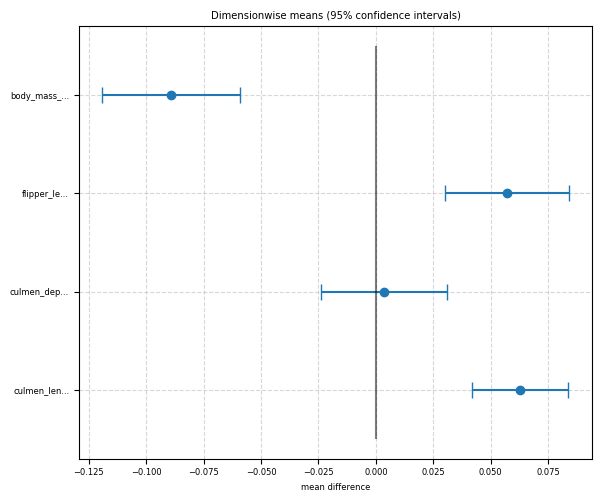

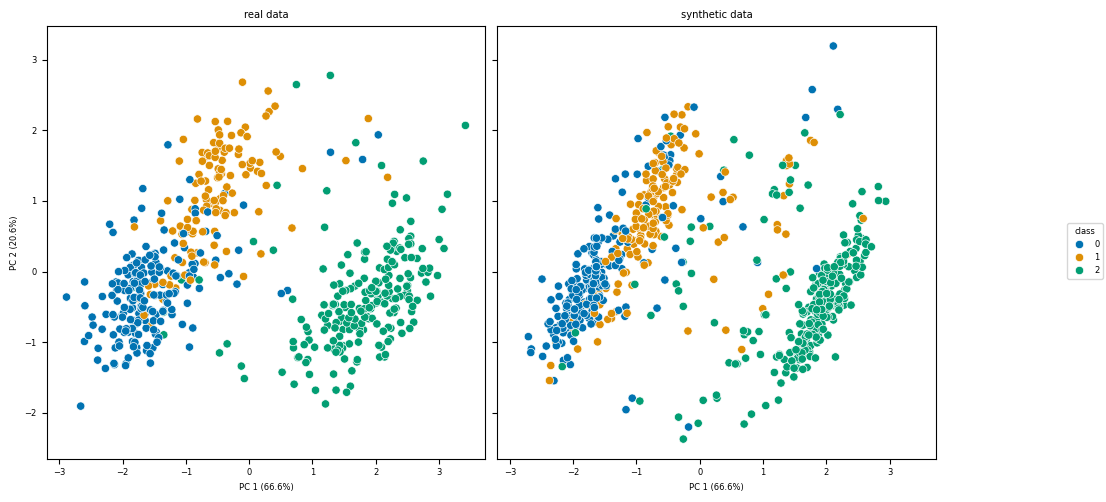

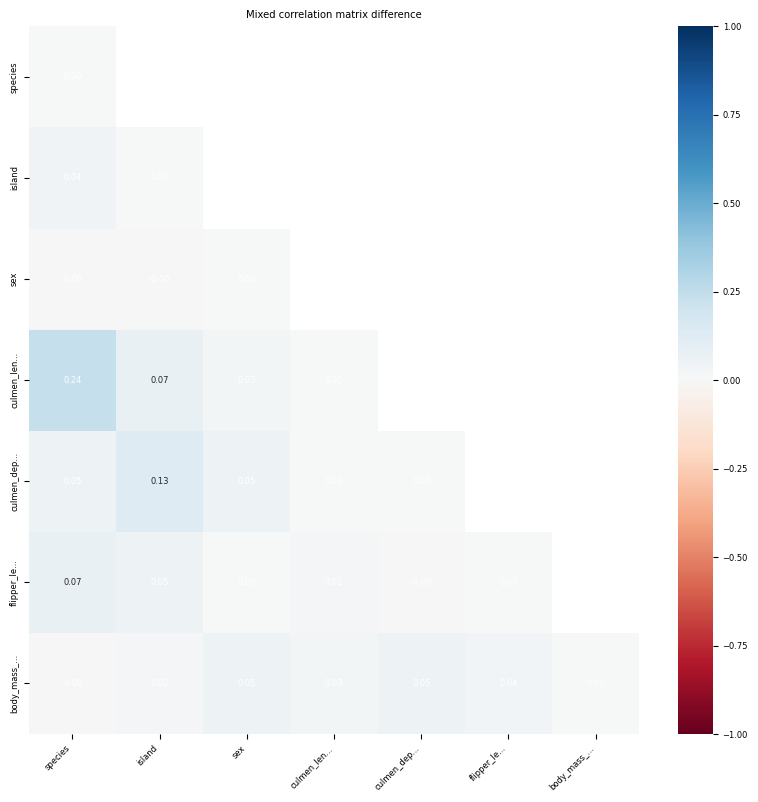

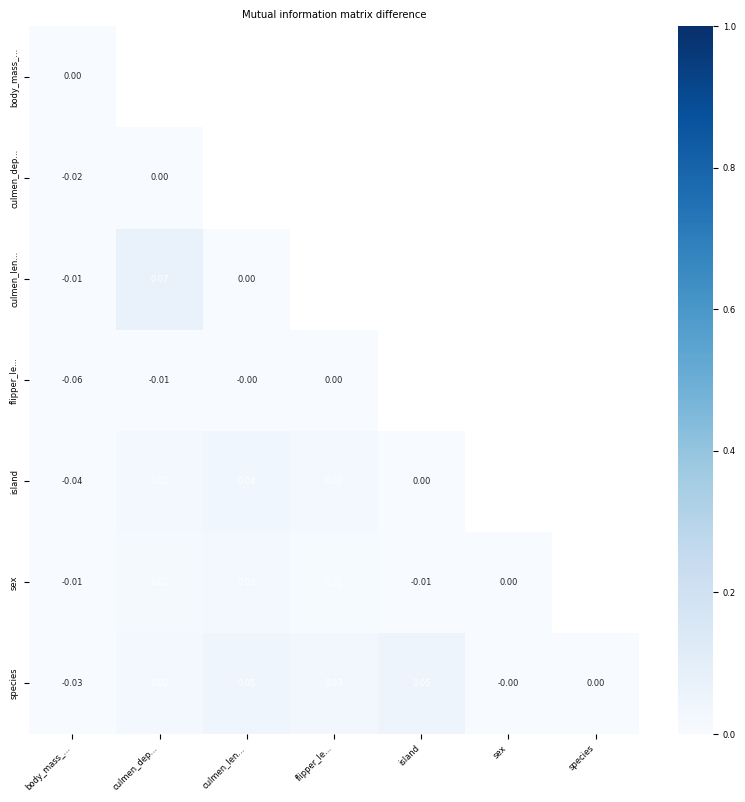

In [96]:
# Eval
S = SynthEval(penguins_train_ctgan_stack_v1, holdout_dataframe=penguins_test_ctgan_stack_v1)
_ = S.evaluate(penguins_ctgan_syn_v2,target,"full_eval")

Stacking newest syn on current stack

In [100]:
# Combine ctgan_syn_v2 with ctgan_stack_v1
combined_df = pd.concat([penguins_ctgan_stack_v1, penguins_ctgan_syn_v2], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v2.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v2 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v2.csv")
gen_count = penguins_ctgan_stack_v2.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v2, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v2.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v2.csv", index=False)


In [58]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v2 = pd.read_csv("penguins_train_ctgan_stacked_v2.csv")
penguins_test_ctgan_stack_v2 = pd.read_csv("penguins_test_ctgan_stacked_v2.csv")

Training on ctgan_stack_v2 and generating ctgan_syn_v3

In [102]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v2).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v3.csv", key="synth")

[2024-04-29T12:47:49.480224+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 40%|███▉      | 799/2000 [05:04<07:38,  2.62it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie     Biscoe              35.8             18.1   
1        Adelie  Torgersen              36.1             19.1   
2        Adelie     Biscoe              38.5             14.4   
3     Chinstrap      Dream              46.7             17.9   
4        Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1063     Adelie  Torgersen              36.8             17.6   
1064     Gentoo     Biscoe              40.0             14.3   
1065  Chinstrap      Dream              42.1             16.8   
1066     Adelie     Biscoe              35.3             17.8   
1067     Gentoo     Biscoe              43.1             14.8   

      flipper_length_mm  body_mass_g     sex  
0                 177.1       3672.6  FEMALE  
1                 180.5       4049.2  FEMALE  
2                 190.4       4853.7    MALE  
3                 19

Eval of ctgan_syn_v3

In [59]:
# Read syn data
penguins_ctgan_syn_v3 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v3.csv").round(1)

# Remove first col
penguins_ctgan_syn_v3 = penguins_ctgan_syn_v3.iloc[:, 1:]

In [60]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v2, holdout_dataframe=penguins_test_ctgan_stack_v2, verbose=0)
res_stack_v2 = S.evaluate(penguins_ctgan_syn_v3,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.047832  0.004802  0.952168  0.004802
1    pca_eigval_diff   u  0.013960       NaN  0.986040       NaN
2     pca_eigvec_ang   u  0.019994       NaN  0.993636       NaN
3            avg_cio   u  0.166097  0.166097  0.166097  0.166097
4      corr_mat_diff   u  0.359852       NaN  0.982864       NaN
5    mutual_inf_diff   u  0.229886       NaN  0.989053       NaN
6        ks_tvd_stat   u  0.095591  0.035819  0.904409  0.035819
7       frac_ks_sigs   u  0.571429       NaN  0.428571       NaN
8         avg_h_dist   u  0.008597  0.004409  0.991403  0.004409
9           avg_pMSE   u  0.036452  0.001929  0.854193  0.007718
10          avg_nndr   p  0.811533  0.004921  0.811533  0.004921
11    priv_loss_nndr   p  0.003097  0.010555  0.996903  0.004921
12              nnaa   u  0.737256  0.000000  0.262744  0.000000
13    priv_loss_nnaa   p -0.021087  0.003740  0.978913  0.003740
14       cls_F1_diff   u  0.040735  0.004981  0.959265  0.004981
15  cls_F1_diff_hout   u  0.063433  0.017167  0.936567  0.017167
16        median_DCR   p  1.575286       NaN  0.917863       NaN
17          hit_rate   p  0.088951       NaN  0.911049       NaN
18  eps_identif_risk   p  0.302434       NaN  0.697566       NaN
19      mia_cls_risk   p  0.900000  0.013679  0.100000  0.013679
20    att_discl_risk   p  0.447819  0.117821  0.552181  0.117821

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  65%|██████▍   | 11/17 [00:04<00:02,  2.98it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:08<00:00,  1.99it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0478  0.0048   |
| PCA difference in eigenvalues (exp. var.):   0.0140           |
| PCA angle between eigenvectors (radians) :   0.0200           |
| Average confidence interval overlap      :   0.1661  0.1661   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   0.3599           |
| Pairwise mutual information difference   :   0.2299           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0956  0.0358   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1516  0.0450   |
|       -> avg. Total Variation Distance   :   0.0210  0.0074   |
|   -> average combined p-val

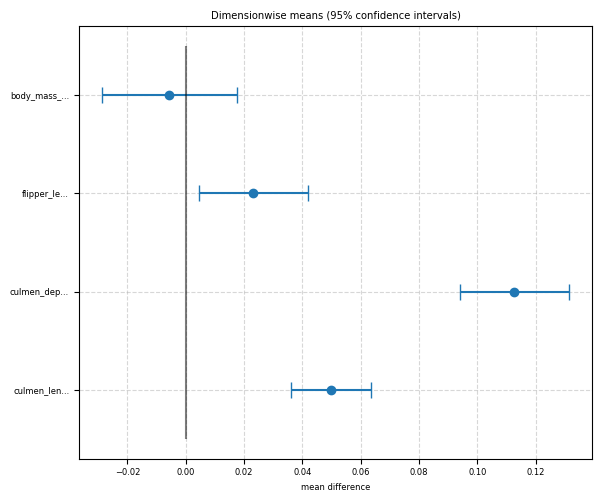

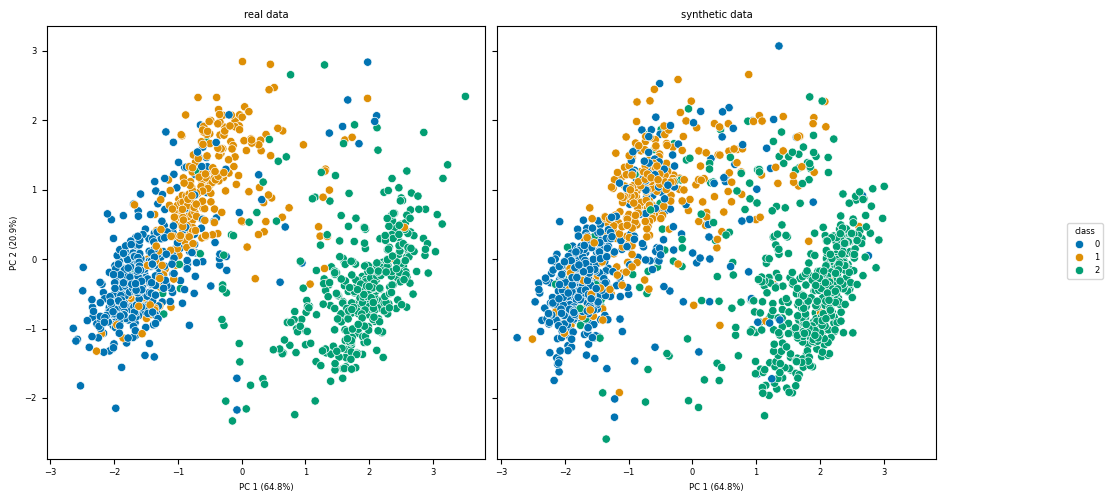

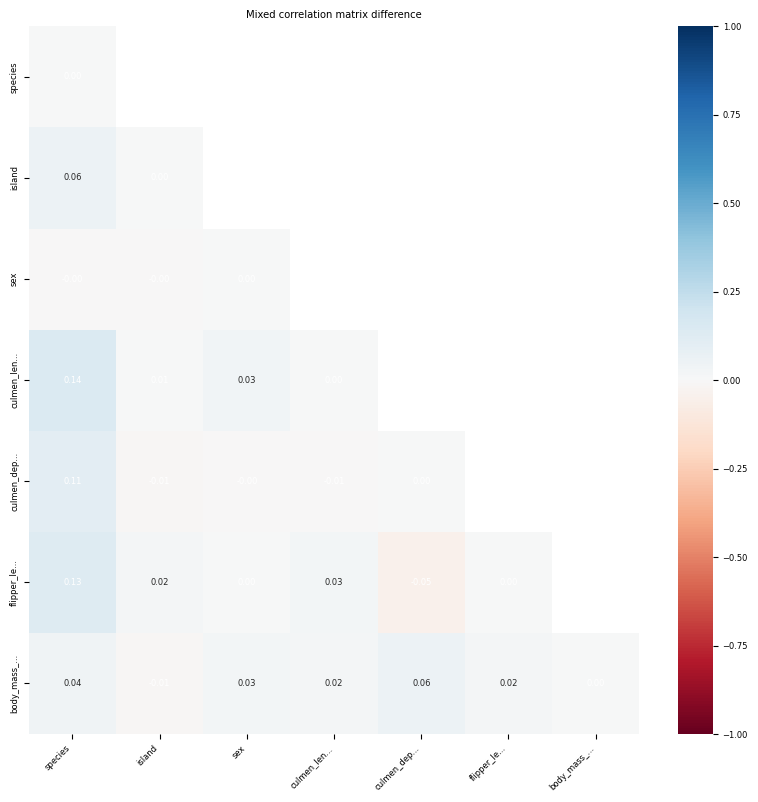

In [104]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v2, holdout_dataframe=penguins_test_ctgan_stack_v2)
_ = S.evaluate(penguins_ctgan_syn_v3,target,"full_eval")

Stacking ctgan_syn_v3 on ctgan_stack_v2

In [105]:
# Combine ctgan_syn_v3 with ctgan_stack_v2
combined_df = pd.concat([penguins_ctgan_stack_v2, penguins_ctgan_syn_v3], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v3.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v3 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v3.csv")
gen_count = penguins_ctgan_stack_v3.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v3, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v3.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v3.csv", index=False)

In [61]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v3 = pd.read_csv("penguins_train_ctgan_stacked_v3.csv")
penguins_test_ctgan_stack_v3 = pd.read_csv("penguins_test_ctgan_stacked_v3.csv")

Training on ctgan_stack_v3 and generating ctgan_syn_v4

In [107]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v3).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v4.csv", key="synth")

[2024-04-29T12:56:53.503230+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▍      | 699/2000 [08:44<16:17,  1.33it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0     Chinstrap      Dream              38.7             16.7   
1        Adelie      Dream              35.0             17.8   
2        Adelie  Torgersen              42.8             18.5   
3        Gentoo     Biscoe              37.7             13.8   
4        Gentoo     Biscoe              44.6             14.6   
...         ...        ...               ...              ...   
2132     Gentoo     Biscoe              47.7             14.7   
2133     Adelie  Torgersen              36.8             17.6   
2134     Gentoo     Biscoe              40.0             14.3   
2135  Chinstrap      Dream              42.1             16.8   
2136     Adelie     Biscoe              35.3             17.8   

      flipper_length_mm  body_mass_g     sex  
0                 185.1       3512.9  FEMALE  
1                 184.1       3361.4  FEMALE  
2                 195.0       4250.0    MALE  
3                 18

Eval of ctgan_syn_v4

In [62]:
# Read syn data
penguins_ctgan_syn_v4 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v4.csv").round(1)

# Remove first col
penguins_ctgan_syn_v4 = penguins_ctgan_syn_v4.iloc[:, 1:]

In [63]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v3, holdout_dataframe=penguins_test_ctgan_stack_v3, verbose=0)
res_stack_v3 = S.evaluate(penguins_ctgan_syn_v4,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.049681  0.003430  0.950319  0.003430
1    pca_eigval_diff   u  0.031355       NaN  0.968645       NaN
2     pca_eigvec_ang   u  0.006298       NaN  0.997995       NaN
3            avg_cio   u  0.000000  0.000000  0.000000  0.000000
4      corr_mat_diff   u  0.295376       NaN  0.985934       NaN
5    mutual_inf_diff   u  0.163168       NaN  0.992230       NaN
6        ks_tvd_stat   u  0.093461  0.029042  0.906539  0.029042
7       frac_ks_sigs   u  0.714286       NaN  0.285714       NaN
8         avg_h_dist   u  0.007667  0.003972  0.992333  0.003972
9           avg_pMSE   u  0.010432  0.000728  0.958270  0.002911
10          avg_nndr   p  0.809797  0.003429  0.809797  0.003429
11    priv_loss_nndr   p -0.012824  0.008268  0.987176  0.003429
12              nnaa   u  0.708505  0.000000  0.291495  0.000000
13    priv_loss_nnaa   p -0.035857  0.002915  0.964143  0.002915
14       cls_F1_diff   u  0.032402  0.006932  0.967598  0.006932
15  cls_F1_diff_hout   u  0.035981  0.022603  0.964019  0.022603
16        median_DCR   p  1.411839       NaN  0.887884       NaN
17          hit_rate   p  0.158166       NaN  0.841834       NaN
18  eps_identif_risk   p  0.331774       NaN  0.668226       NaN
19      mia_cls_risk   p  0.888060  0.012206  0.111940  0.012206
20    att_discl_risk   p  0.437767  0.118173  0.562233  0.118173

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:07<00:06,  1.06it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0497  0.0034   |
| PCA difference in eigenvalues (exp. var.):   0.0314           |
| PCA angle between eigenvectors (radians) :   0.0063           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.2954           |
| Pairwise mutual information difference   :   0.1632           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0935  0.0290   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1456  0.0288   |
|       -> avg. Total Variation Distance   :   0.0240  0.0053   |
|   -> average combined p-val

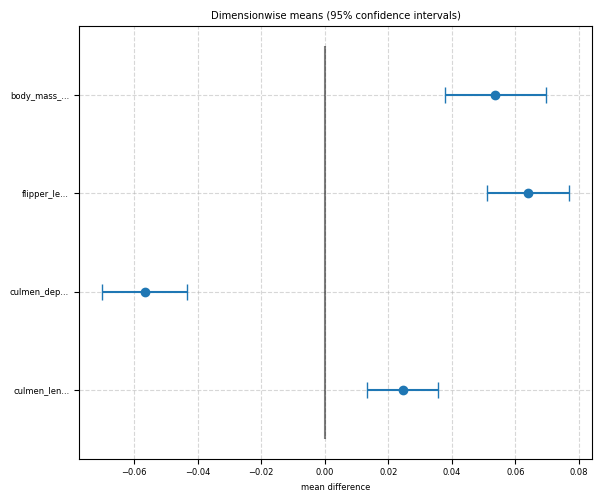

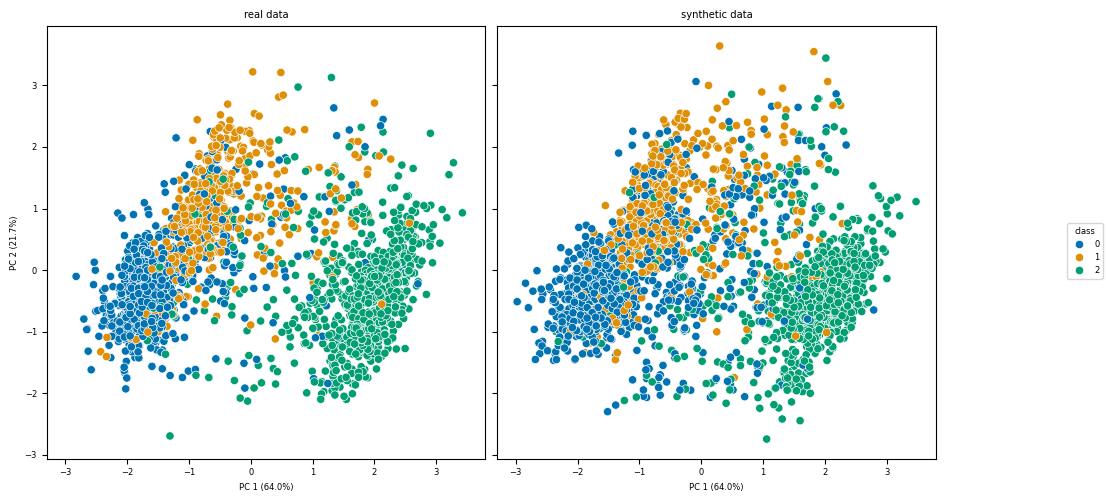

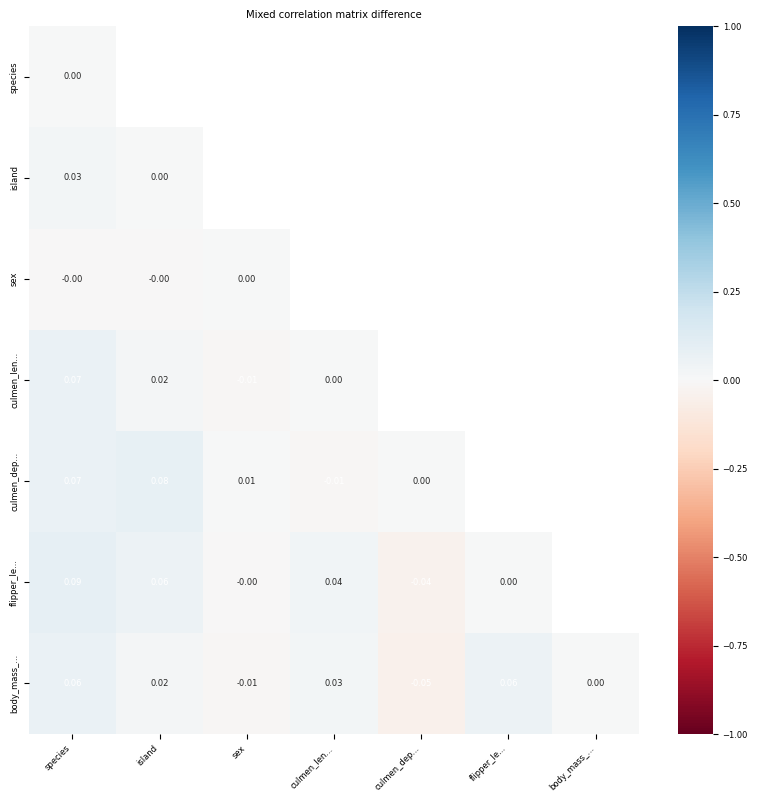

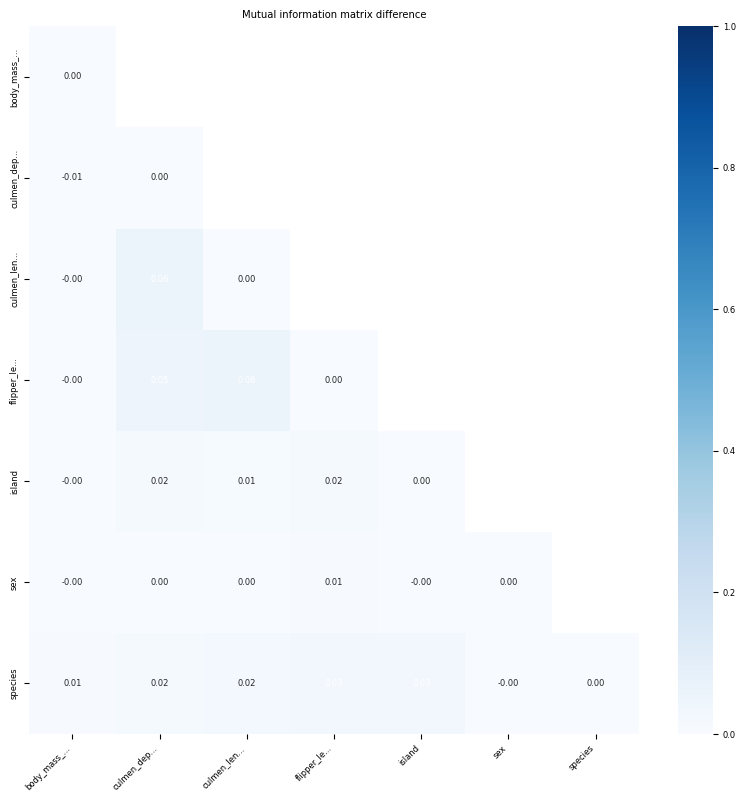

In [109]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v3, holdout_dataframe=penguins_test_ctgan_stack_v3)
_ = S.evaluate(penguins_ctgan_syn_v4,target,"full_eval")

Stacking ctgan_syn_v4 on ctgan_stack_v3

In [110]:
# Combine ctgan_syn_v4 with ctgan_stack_v3
combined_df = pd.concat([penguins_ctgan_stack_v3, penguins_ctgan_syn_v4], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v4.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v4 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v4.csv")
gen_count = penguins_ctgan_stack_v4.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v4, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v4.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v4.csv", index=False)

In [64]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v4 = pd.read_csv("penguins_train_ctgan_stacked_v4.csv")
penguins_test_ctgan_stack_v4 = pd.read_csv("penguins_test_ctgan_stacked_v4.csv")

Training on ctgan_stack_v4 and generating ctgan_syn_v5

In [112]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v4).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v5.csv", key="synth")

[2024-04-29T13:06:52.170389+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▍      | 699/2000 [20:55<38:56,  1.80s/it]  


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0     Chinstrap      Dream              43.6             18.9   
1        Adelie  Torgersen              38.8             17.6   
2        Gentoo     Biscoe              38.1             13.1   
3        Adelie  Torgersen              33.6             17.3   
4        Adelie  Torgersen              34.2             18.3   
...         ...        ...               ...              ...   
4270     Gentoo     Biscoe              47.0             14.6   
4271     Gentoo     Biscoe              46.4             13.9   
4272  Chinstrap      Dream              44.9             17.8   
4273     Adelie      Dream              36.4             17.2   
4274     Adelie     Biscoe              35.3             17.8   

      flipper_length_mm  body_mass_g     sex  
0                 192.7       3559.9    MALE  
1                 191.0       3275.0  FEMALE  
2                 204.4       6300.0  FEMALE  
3                 19

Eval of ctgan_syn_v5

In [65]:
# Read syn data
penguins_ctgan_syn_v5 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v5.csv").round(1)

# Remove first col
penguins_ctgan_syn_v5 = penguins_ctgan_syn_v5.iloc[:, 1:]

In [66]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v4, holdout_dataframe=penguins_test_ctgan_stack_v4, verbose=0)
res_stack_v4 = S.evaluate(penguins_ctgan_syn_v5,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.044001  0.002355  0.955999  0.002355
1    pca_eigval_diff   u  0.035509       NaN  0.964491       NaN
2     pca_eigvec_ang   u  0.022901       NaN  0.992710       NaN
3            avg_cio   u  0.000000  0.000000  0.000000  0.000000
4      corr_mat_diff   u  0.257353       NaN  0.987745       NaN
5    mutual_inf_diff   u  0.179089       NaN  0.991472       NaN
6        ks_tvd_stat   u  0.088478  0.028751  0.911522  0.028751
7       frac_ks_sigs   u  0.857143       NaN  0.142857       NaN
8         avg_h_dist   u  0.012745  0.008127  0.987255  0.008127
9           avg_pMSE   u  0.027406  0.000445  0.890374  0.001779
10          avg_nndr   p  0.817248  0.002383  0.817248  0.002383
11    priv_loss_nndr   p  0.002869  0.005269  0.997131  0.002383
12              nnaa   u  0.657551  0.000000  0.342449  0.000000
13    priv_loss_nnaa   p -0.039902  0.001581  0.960098  0.001581
14       cls_F1_diff   u  0.026725  0.002830  0.973275  0.002830
15  cls_F1_diff_hout   u  0.011693  0.005528  0.988307  0.005528
16        median_DCR   p  1.196380       NaN  0.832547       NaN
17          hit_rate   p  0.318830       NaN  0.681170       NaN
18  eps_identif_risk   p  0.400234       NaN  0.599766       NaN
19      mia_cls_risk   p  0.917383  0.004069  0.082617  0.004069
20    att_discl_risk   p  0.452390  0.110296  0.547610  0.110296

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:17<00:19,  2.79s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:37<00:00,  2.20s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0440  0.0024   |
| PCA difference in eigenvalues (exp. var.):   0.0355           |
| PCA angle between eigenvectors (radians) :   0.0229           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.2574           |
| Pairwise mutual information difference   :   0.1791           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0885  0.0288   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1241  0.0412   |
|       -> avg. Total Variation Distance   :   0.0410  0.0203   |
|   -> average combined p-val

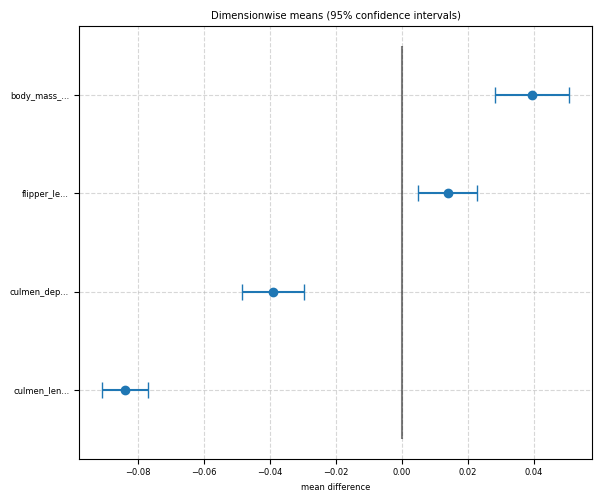

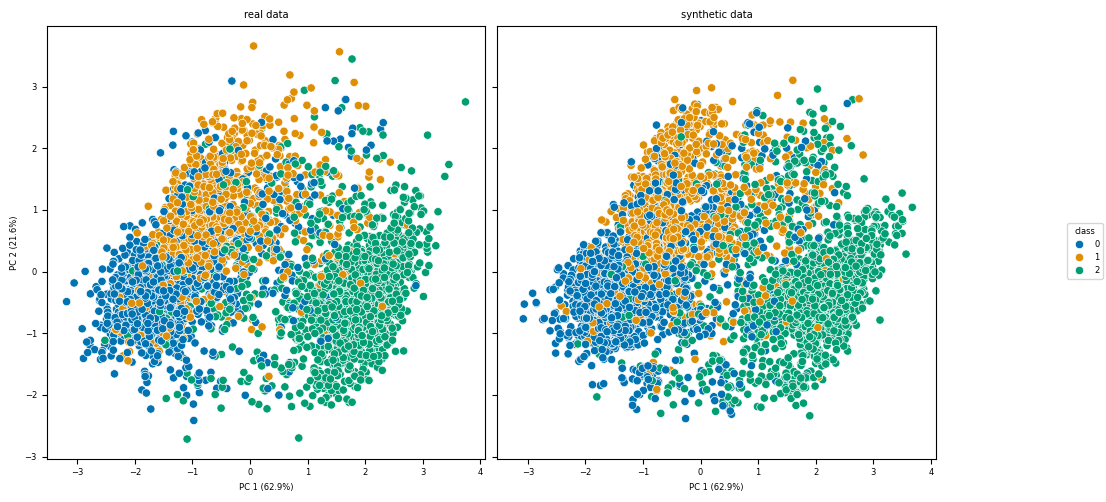

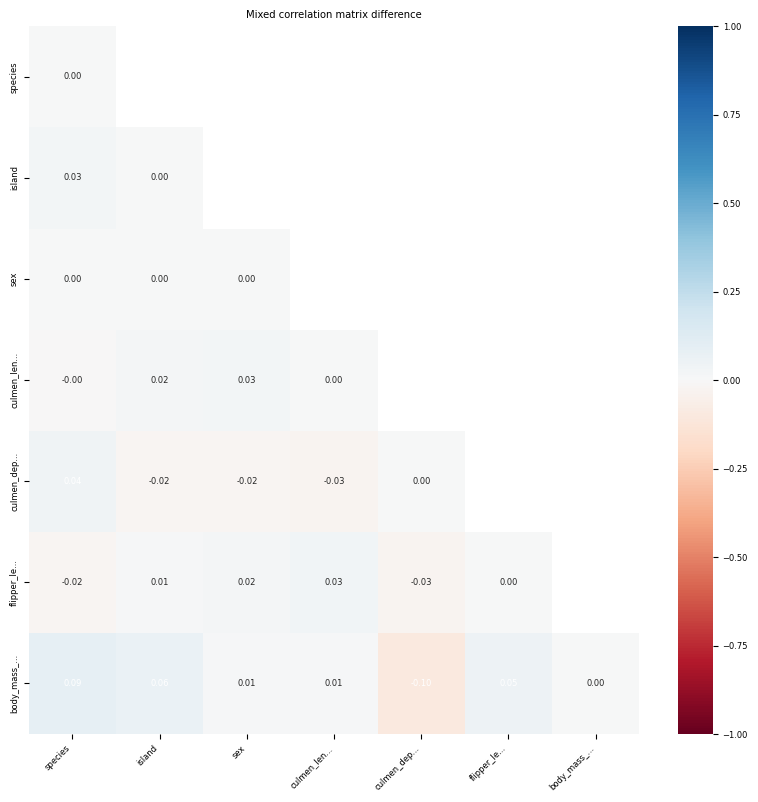

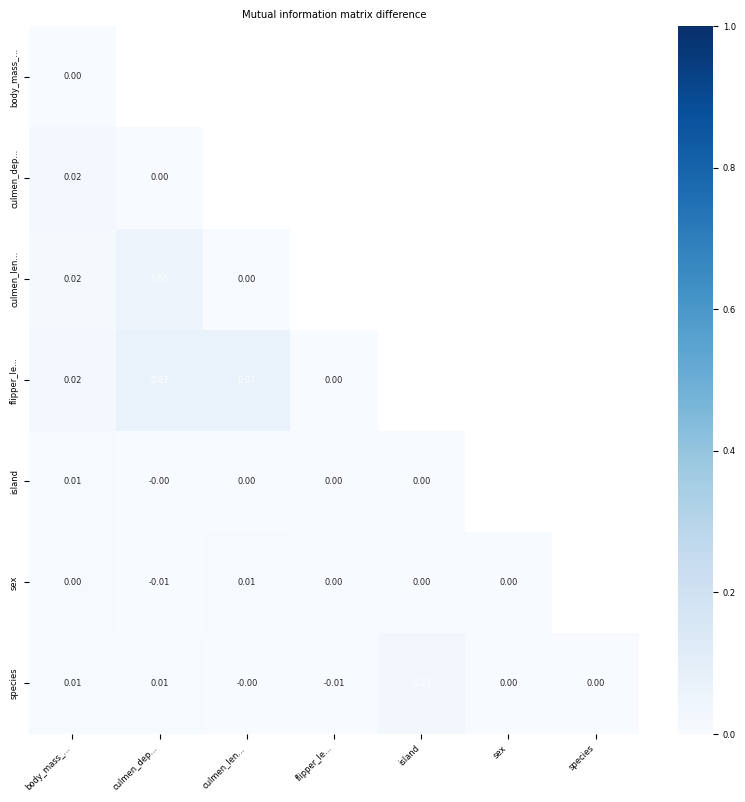

In [114]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v4, holdout_dataframe=penguins_test_ctgan_stack_v4)
_ = S.evaluate(penguins_ctgan_syn_v5,target,"full_eval")

Stacking ctgan_syn_v5 on ctgan_stack_v4

In [115]:
# Combine ctgan_syn_v5 with ctgan_stack_v4
combined_df = pd.concat([penguins_ctgan_stack_v4, penguins_ctgan_syn_v5], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v5.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v5 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v5.csv")
gen_count = penguins_ctgan_stack_v5.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v5, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v5.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v5.csv", index=False)

In [67]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v5 = pd.read_csv("penguins_train_ctgan_stacked_v5.csv")
penguins_test_ctgan_stack_v5 = pd.read_csv("penguins_test_ctgan_stacked_v5.csv")

Training on ctgan_stack_v5 and generating ctgan_syn_v6

In [117]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v5).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v6.csv", key="synth")

[2024-04-29T13:28:27.626890+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 32%|███▏      | 649/2000 [38:16<1:19:41,  3.54s/it]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie      Dream              39.5             20.4   
1        Gentoo     Biscoe              50.3             19.4   
2     Chinstrap      Dream              39.6             19.5   
3        Gentoo     Biscoe              39.0             14.8   
4     Chinstrap      Dream              47.2             19.4   
...         ...        ...               ...              ...   
8545     Gentoo     Biscoe              47.1             14.5   
8546  Chinstrap      Dream              44.9             17.8   
8547     Adelie      Dream              44.8             18.3   
8548     Adelie     Biscoe              35.3             17.8   
8549     Adelie  Torgersen              39.4             20.0   

      flipper_length_mm  body_mass_g     sex  
0                 190.7       4386.5    MALE  
1                 217.3       5596.1    MALE  
2                 185.6       3264.0  FEMALE  
3                 19

Eval of ctgan_syn_v6

In [68]:
# Read syn data
penguins_ctgan_syn_v6 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v6.csv").round(1)

# Remove first col
penguins_ctgan_syn_v6 = penguins_ctgan_syn_v6.iloc[:, 1:]

In [69]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v5, holdout_dataframe=penguins_test_ctgan_stack_v5, verbose=0)
res_stack_v5 = S.evaluate(penguins_ctgan_syn_v6,target,"full_eval")
res_stack_v5

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.034568  0.001670  0.965432  0.001670
1    pca_eigval_diff   u  0.020975       NaN  0.979025       NaN
2     pca_eigvec_ang   u  0.020147       NaN  0.993587       NaN
3            avg_cio   u  0.000000  0.000000  0.000000  0.000000
4      corr_mat_diff   u  0.164503       NaN  0.992167       NaN
5    mutual_inf_diff   u  0.177229       NaN  0.991561       NaN
6        ks_tvd_stat   u  0.074094  0.024624  0.925906  0.024624
7       frac_ks_sigs   u  0.857143       NaN  0.142857       NaN
8         avg_h_dist   u  0.009111  0.005748  0.990889  0.005748
9           avg_pMSE   u  0.019965  0.000439  0.920138  0.001756
10          avg_nndr   p  0.814118  0.001726  0.814118  0.001726
11    priv_loss_nndr   p  0.000575  0.003794  0.999425  0.001726
12              nnaa   u  0.667211  0.000000  0.332789  0.000000
13    priv_loss_nnaa   p -0.015169  0.001256  0.984831  0.001256
14       cls_F1_diff   u  0.032105  0.002344  0.967895  0.002344
15  cls_F1_diff_hout   u  0.018709  0.008473  0.981291  0.008473
16        median_DCR   p  1.190690       NaN  0.830793       NaN
17          hit_rate   p  0.417895       NaN  0.582105       NaN
18  eps_identif_risk   p  0.385848       NaN  0.614152       NaN
19      mia_cls_risk   p  0.895229  0.004640  0.104771  0.004640
20    att_discl_risk   p  0.452671  0.109397  0.547329  0.109397

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:53<01:12, 10.35s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [01:34<00:00,  5.54s/it]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0346  0.0017   |
| PCA difference in eigenvalues (exp. var.):   0.0210           |
| PCA angle between eigenvectors (radians) :   0.0201           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.1645           |
| Pairwise mutual information difference   :   0.1772           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0741  0.0246   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1107  0.0321   |
|       -> avg. Total Variation Distance   :   0.0253  0.0104   |
|   -> average combined p-val

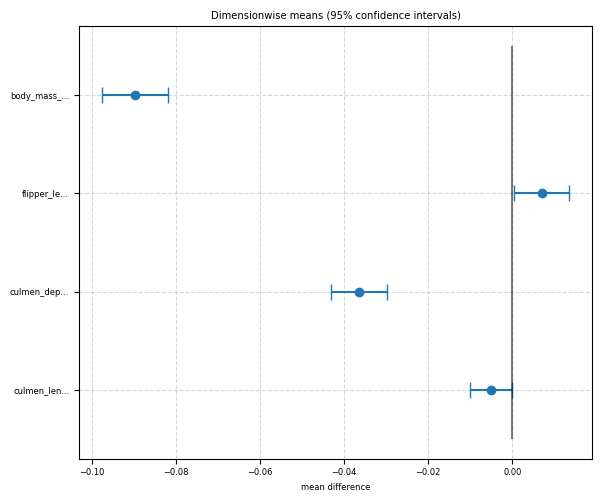

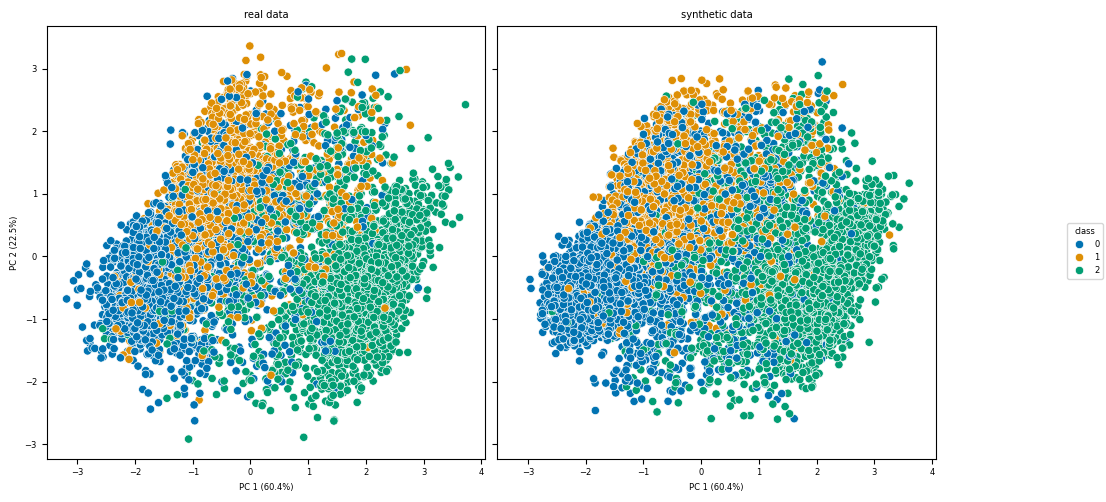

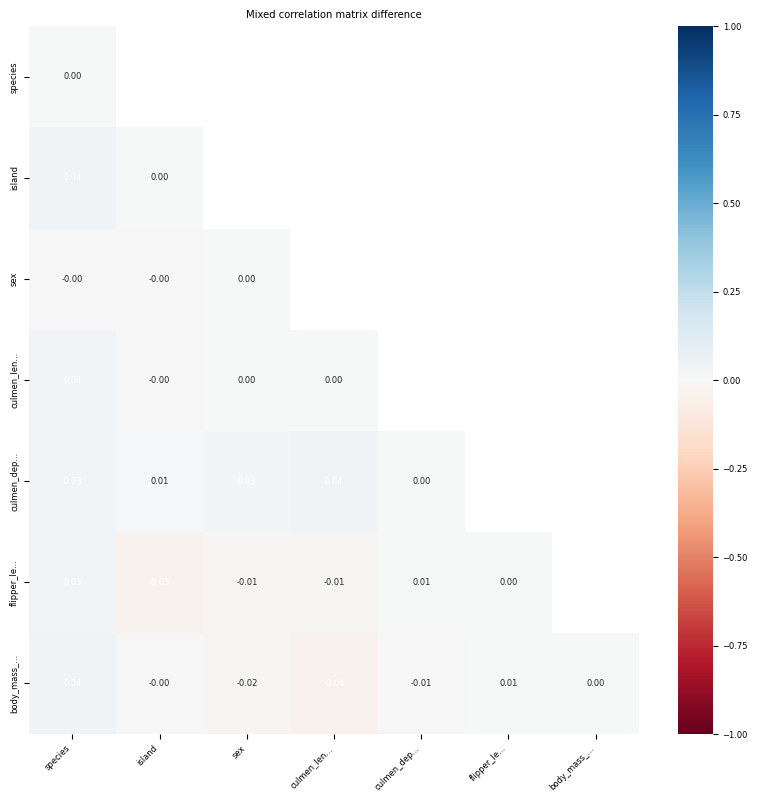

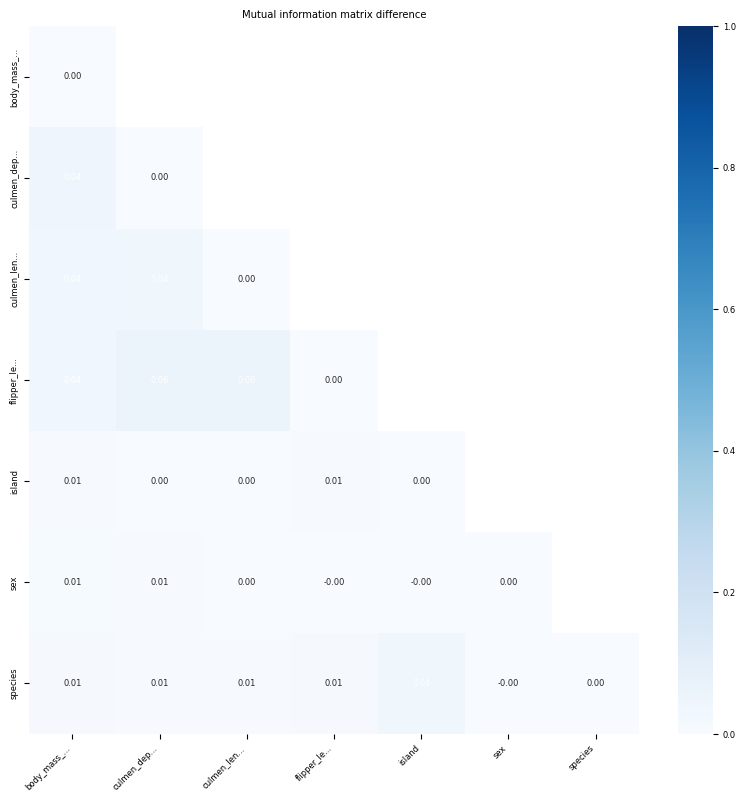

In [119]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v5, holdout_dataframe=penguins_test_ctgan_stack_v5)
_ = S.evaluate(penguins_ctgan_syn_v6,target,"full_eval")

Stacking ctgan_syn_v6 on ctgan_stack_v5

In [120]:
# Combine ctgan_syn_v6 with ctgan_stack_v5
combined_df = pd.concat([penguins_ctgan_stack_v5, penguins_ctgan_syn_v6], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v6.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v6 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v6.csv")
gen_count = penguins_ctgan_stack_v6.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v6, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v6.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v6.csv", index=False)

In [70]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v6 = pd.read_csv("penguins_train_ctgan_stacked_v6.csv")
penguins_test_ctgan_stack_v6 = pd.read_csv("penguins_test_ctgan_stacked_v6.csv")

Training on ctgan_stack_v6 and generating ctgan_syn_v7

In [122]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v6).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v7.csv", key="synth")

[2024-04-29T14:08:22.993098+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 55%|█████▍    | 1099/2000 [2:21:50<1:56:17,  7.74s/it]


[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
0         Adelie  Torgersen              38.3             19.6   
1         Adelie      Dream              46.8             18.2   
2         Gentoo      Dream              47.0             15.3   
3         Adelie     Biscoe              37.3             19.9   
4         Adelie     Biscoe              36.4             18.0   
...          ...        ...               ...              ...   
17095  Chinstrap  Torgersen              46.4             17.0   
17096     Adelie      Dream              40.9             19.0   
17097     Adelie      Dream              44.8             18.3   
17098     Adelie     Biscoe              35.3             17.8   
17099     Adelie      Dream              35.5             18.4   

       flipper_length_mm  body_mass_g     sex  
0                  184.5       3718.2  FEMALE  
1                  186.7       3942.3  FEMALE  
2                  190.6       5676.4    MALE  
3   

Eval of ctgan_syn_v7

In [71]:
# Read syn data
penguins_ctgan_syn_v7 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v7.csv").round(1)

# Remove first col
penguins_ctgan_syn_v7 = penguins_ctgan_syn_v7.iloc[:, 1:]

In [72]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v6, holdout_dataframe=penguins_test_ctgan_stack_v6, verbose=0)
res_stack_v6 = S.evaluate(penguins_ctgan_syn_v7,target,"full_eval")
res_stack_v6

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.023202  0.001170  0.976798  0.001170
1    pca_eigval_diff   u  0.016200       NaN  0.983800       NaN
2     pca_eigvec_ang   u  0.016399       NaN  0.994780       NaN
3            avg_cio   u  0.000000  0.000000  0.000000  0.000000
4      corr_mat_diff   u  0.248356       NaN  0.988174       NaN
5    mutual_inf_diff   u  0.184598       NaN  0.991210       NaN
6        ks_tvd_stat   u  0.082783  0.020082  0.917217  0.020082
7       frac_ks_sigs   u  1.000000       NaN  0.000000       NaN
8         avg_h_dist   u  0.011486  0.006783  0.988514  0.006783
9           avg_pMSE   u  0.012151  0.000244  0.951395  0.000977
10          avg_nndr   p  0.813993  0.001241  0.813993  0.001241
11    priv_loss_nndr   p -0.000502  0.002738  0.999498  0.001241
12              nnaa   u  0.713491  0.000000  0.286509  0.000000
13    priv_loss_nnaa   p -0.040077  0.000730  0.959923  0.000730
14       cls_F1_diff   u  0.019942  0.002383  0.980058  0.002383
15  cls_F1_diff_hout   u  0.016370  0.009618  0.983630  0.009618
16        median_DCR   p  1.286515       NaN  0.858211       NaN
17          hit_rate   p  0.466608       NaN  0.533392       NaN
18  eps_identif_risk   p  0.344503       NaN  0.655497       NaN
19      mia_cls_risk   p  0.722919  0.006607  0.277081  0.006607
20    att_discl_risk   p  0.443288  0.110199  0.556712  0.110199

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  65%|██████▍   | 11/17 [16:09<17:15, 172.63s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [26:14<00:00, 92.60s/it] 



SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0232  0.0012   |
| PCA difference in eigenvalues (exp. var.):   0.0162           |
| PCA angle between eigenvectors (radians) :   0.0164           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.2484           |
| Pairwise mutual information difference   :   0.1846           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0828  0.0201   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.1207  0.0150   |
|       -> avg. Total Variation Distance   :   0.0322  0.0115   |
|   -> average combined p-val

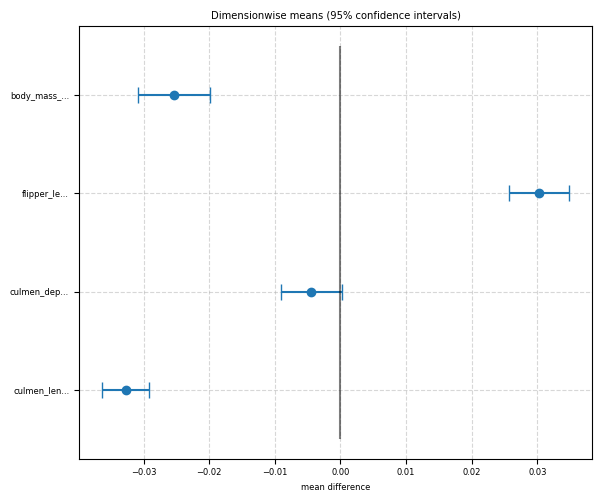

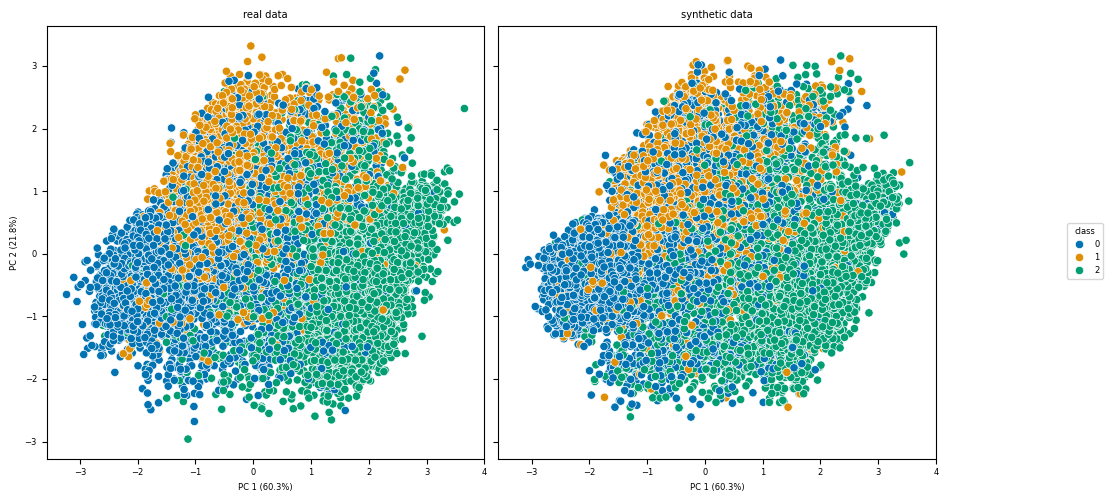

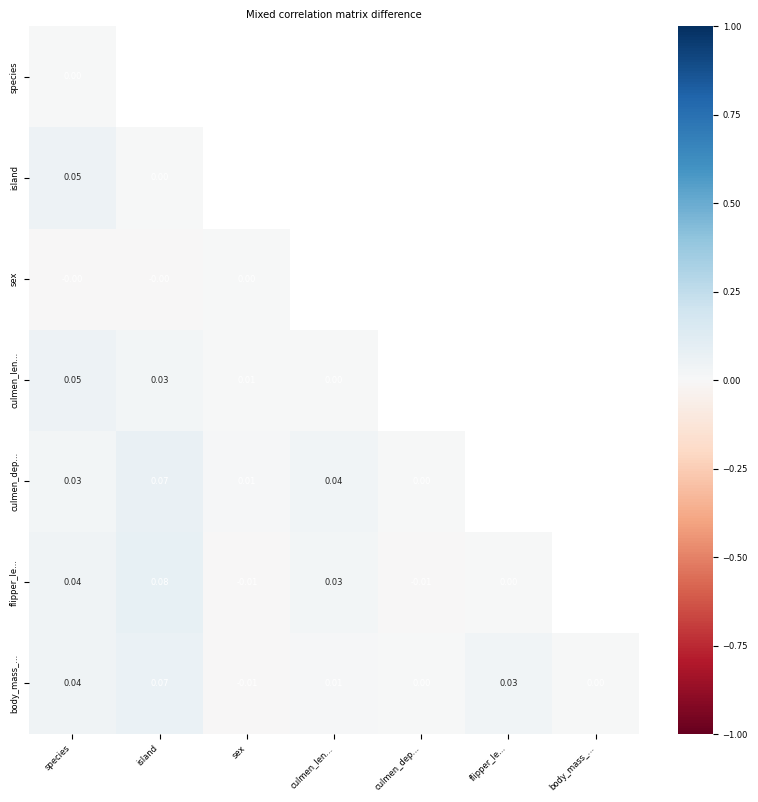

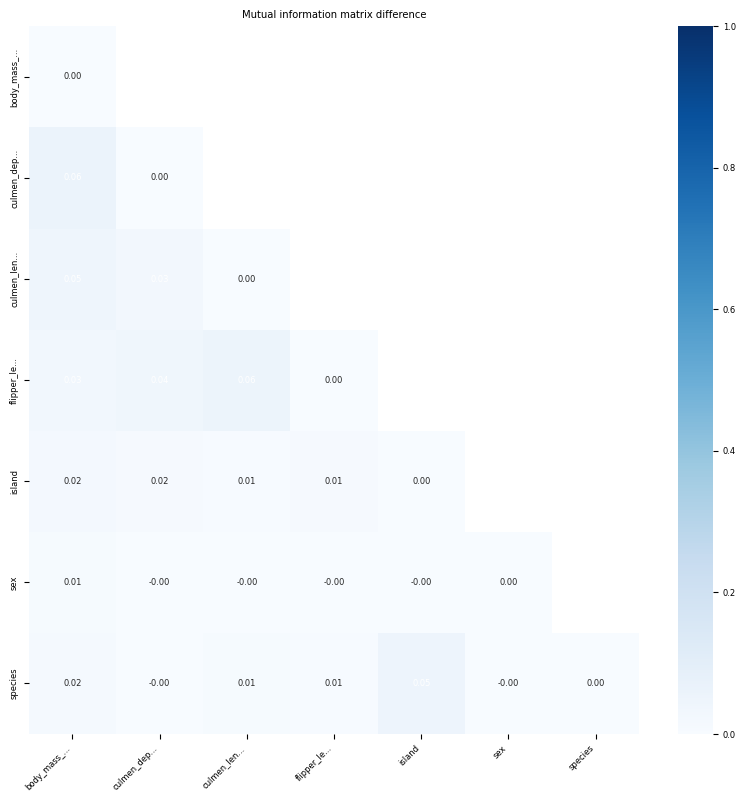

In [124]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v6, holdout_dataframe=penguins_test_ctgan_stack_v6)
_ = S.evaluate(penguins_ctgan_syn_v7,target,"full_eval")

Stacking ctgan_syn_v7 on ctgan_stack_v6

In [125]:
# Combine ctgan_syn_v7 with ctgan_stack_v6
combined_df = pd.concat([penguins_ctgan_stack_v6, penguins_ctgan_syn_v7], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v7.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v7 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v7.csv")
gen_count = penguins_ctgan_stack_v7.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v7, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v7.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v7.csv", index=False)

In [126]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v7 = pd.read_csv("penguins_train_ctgan_stacked_v7.csv")
penguins_test_ctgan_stack_v7 = pd.read_csv("penguins_test_ctgan_stacked_v7.csv")

Training on ctgan_stack_v7 and generating ctgan_syn_v8

In [127]:
# Synthesize data with synthesizers
Load(penguins_train_ctgan_stack_v7).Train(train_adapter="synthcity", plugin="ctgan").Generate(count=gen_count).Save(name="penguins_ctgan_syn_v8.csv", key="synth")

[2024-04-29T16:56:37.434230+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 37%|███▋      | 749/2000 [2:13:49<3:43:30, 10.72s/it]


[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
0         Gentoo      Dream              40.3             19.0   
1      Chinstrap      Dream              46.5             17.3   
2         Gentoo     Biscoe              41.1             15.1   
3         Adelie  Torgersen              41.1             20.6   
4      Chinstrap      Dream              43.5             18.7   
...          ...        ...               ...              ...   
34196     Adelie      Dream              38.3             18.2   
34197  Chinstrap  Torgersen              46.4             17.0   
34198     Gentoo     Biscoe              47.5             15.1   
34199     Adelie     Biscoe              35.3             17.8   
34200     Adelie      Dream              35.5             18.4   

       flipper_length_mm  body_mass_g     sex  
0                  209.8       5836.0  FEMALE  
1                  187.1       4288.5  FEMALE  
2                  210.6       6101.6    MALE  
3   

Eval of ctgan_syn_v8

In [128]:
# Read syn data
penguins_ctgan_syn_v8 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_syn_v8.csv").round(1)

# Remove first col
penguins_ctgan_syn_v8 = penguins_ctgan_syn_v8.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: nndr:  47%|████▋     | 8/17 [00:45<00:50,  5.65s/it]     


MemoryError: Unable to allocate 5.45 GiB for an array with shape (34201, 42752) and data type float32

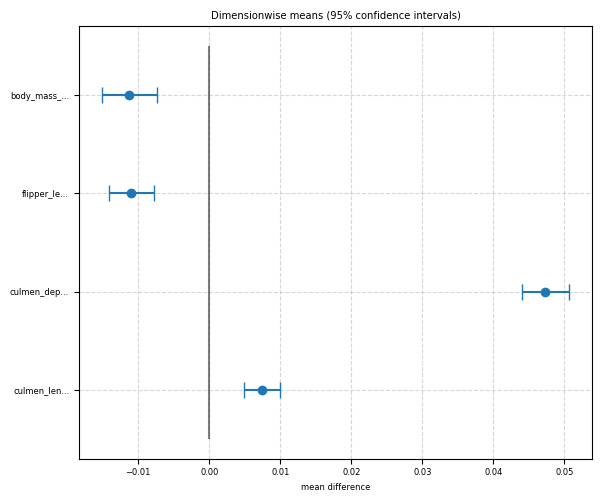

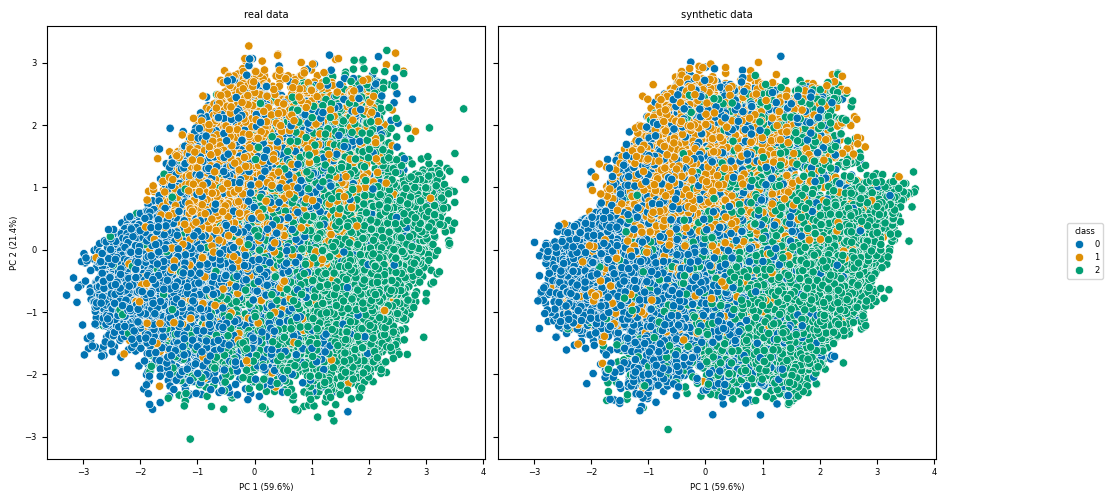

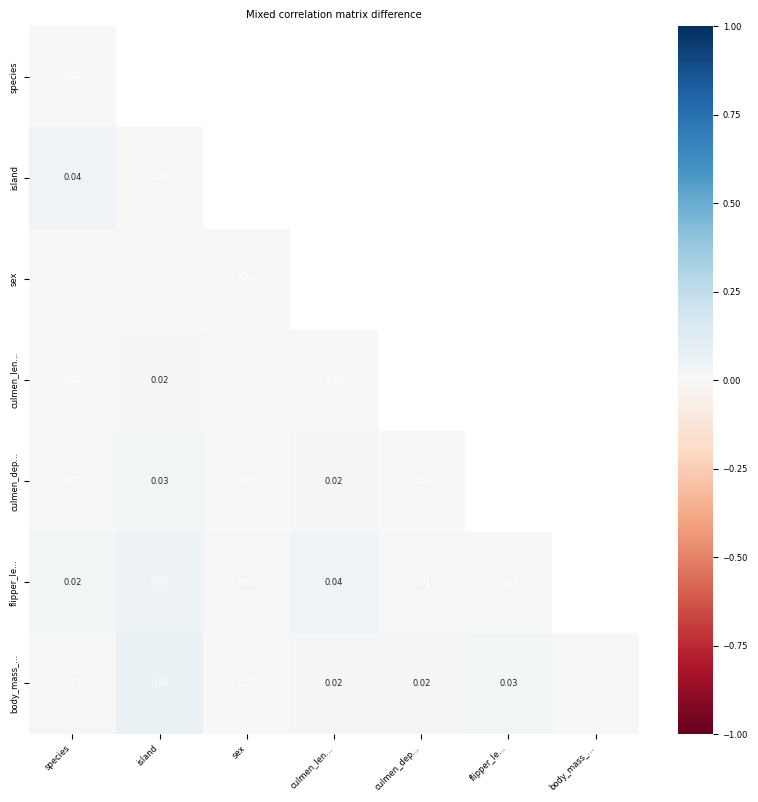

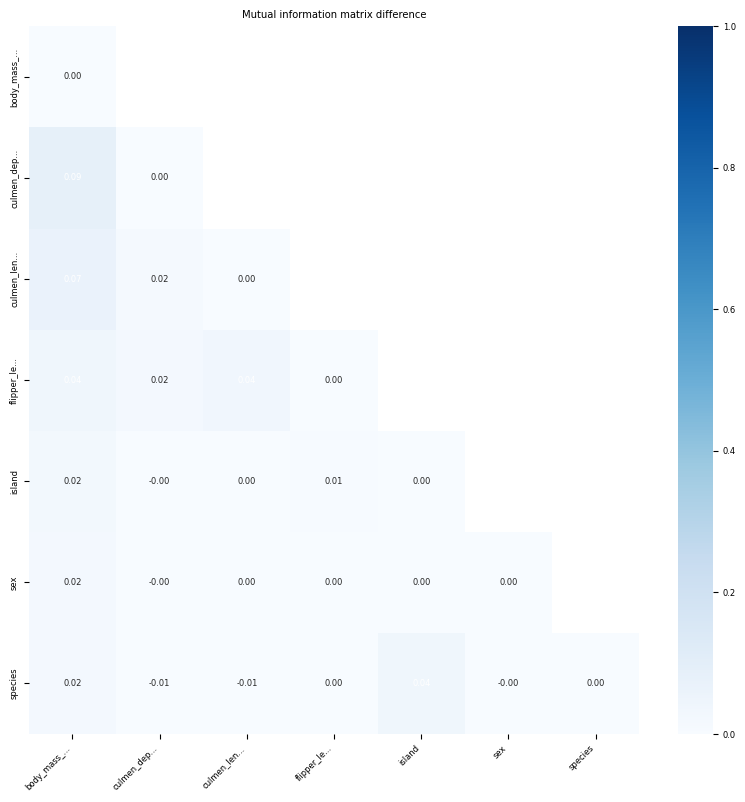

In [130]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v7, holdout_dataframe=penguins_test_ctgan_stack_v7)
_ = S.evaluate(penguins_ctgan_syn_v8,target,"full_eval")

In [131]:
# Evaluate the synthesized data
S = SynthEval(penguins_train_ctgan_stack_v7, holdout_dataframe=penguins_test_ctgan_stack_v7, verbose=0)
res = S.evaluate(penguins_ctgan_syn_v8,target,"full_eval")
res

MemoryError: Unable to allocate 5.45 GiB for an array with shape (34201, 42752) and data type float32

Stacking ctgan_syn_v8 on ctgan_stack_v7

In [132]:
# Combine ctgan_syn_v8 with ctgan_stack_v7
combined_df = pd.concat([penguins_ctgan_stack_v7, penguins_ctgan_syn_v8], ignore_index=True)

# Save to csv
combined_df.to_csv("penguins_ctgan_stack_v8.csv", index=False)

# Read stacked data
penguins_ctgan_stack_v8 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v8.csv")
gen_count = penguins_ctgan_stack_v8.shape[0]

# Split data
train_df, test_df = train_test_split(penguins_ctgan_stack_v8, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_v8.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_v8.csv", index=False)

In [133]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v8 = pd.read_csv("penguins_train_ctgan_stacked_v8.csv")
penguins_test_ctgan_stack_v8 = pd.read_csv("penguins_test_ctgan_stacked_v8.csv")

Training on ctgan_stack_v8 for final comparison

Stack_v8 will be "final stack", and trained as a state to generate multiple syn sets for comparison

In [136]:
# Training on stack_v8 and saving as a state
stack_8_state = Load(penguins_train_ctgan_stack_v8).Train(train_adapter="synthcity", plugin="ctgan").Save("stack_v8")

[2024-04-30T10:48:36.031635+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 37%|███▋      | 749/2000 [4:42:27<7:51:45, 22.63s/it] 


Check stack_v8 and remove original penguins_real from the stack

In [138]:
penguins_ctgan_stack_v8

species     island  culmen_length_mm  culmen_depth_mm  \
0      Adelie  Torgersen              39.1             18.7   
1      Adelie  Torgersen              39.5             17.4   
2      Adelie  Torgersen              40.3             18.0   
3      Adelie  Torgersen              36.7             19.3   
4      Adelie  Torgersen              39.3             20.6   
...       ...        ...               ...              ...   
85499  Adelie     Biscoe              47.1             19.4   
85500  Adelie     Biscoe              40.5             19.5   
85501  Adelie     Biscoe              37.9             18.4   
85502  Adelie      Dream              40.8             19.7   
85503  Adelie     Biscoe              39.9             19.6   

       flipper_length_mm  body_mass_g     sex  
0                  181.0       3750.0    MALE  
1                  186.0       3800.0  FEMALE  
2                  195.0       3250.0  FEMALE  
3                  193.0       3450.0  FEMALE  
4                  190.0       3650.0    MALE  
...                  ...          ...     ...  
85499              211.7       5911.6    MALE  
85500              185.6       4373.5  FEMALE  
85501              183.3       3904.9  FEMALE  
85502              184.7       4058.9  FEMALE  
85503              182.7       3404.4  FEMALE  

[85504 rows x 7 columns]

In [139]:
penguins_real.shape[0]

334

In [140]:
# Remove the first 334 entries from penguins_ctgan_stack_v8, which is equal to the size of penguins_real
penguins_ctgan_stack_full_syn = penguins_ctgan_stack_v8.iloc[334:, :]

In [142]:
penguins_ctgan_stack_full_syn.to_csv("penguins_ctgan_stack_full_syn.csv", index=False)

In [144]:
# Split the full_syn stack
train_df, test_df = train_test_split(penguins_ctgan_stack_full_syn, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_full_syn.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_full_syn.csv", index=False)

In [145]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_full_syn = pd.read_csv("penguins_train_ctgan_stacked_full_syn.csv")
penguins_test_ctgan_stack_full_syn = pd.read_csv("penguins_test_ctgan_stacked_full_syn.csv")

full_syn_stack will be trained and saved in a state for multiple generations and evaluation

In [146]:
ctgan_full_syn_state = Load(penguins_train_ctgan_stack_full_syn).Train(train_adapter="synthcity", plugin="ctgan").Save("full_syn")

[2024-04-30T20:15:20.002062+0200][22308][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 27%|██▋       | 549/2000 [3:29:32<9:13:49, 22.90s/it] 


Going back one generation to stack_v7 as final stack

In [3]:
penguins_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

# Drop NaN values
penguins_real = penguins_real.dropna()

target = 'species'

In [4]:
# Read stacked data
penguins_ctgan_stack_v7 = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_ctgan_stack_v7.csv")
gen_count = penguins_ctgan_stack_v7.shape[0]

# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_v7 = pd.read_csv("penguins_train_ctgan_stacked_v7.csv")
penguins_test_ctgan_stack_v7 = pd.read_csv("penguins_test_ctgan_stacked_v7.csv")

stack_7_state will be "final" state with real_data to generate multiple synth sets for evaluation

In [5]:
# Train on stack_v7 and save as a state
stack_7_state = Load(penguins_train_ctgan_stack_v7).Train(train_adapter="synthcity", plugin="ctgan").Save("stack_v7")

[2024-05-01T08:49:38.751005+0200][10632][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|████▉     | 999/2000 [3:29:11<3:29:36, 12.56s/it] 


Check stack_v7 and remove original penguins_real from the stack

In [6]:
# Remove the first 334 entries from penguins_ctgan_stack_v7, which is equal to the size of penguins_real
penguins_ctgan_stack_full_syn = penguins_ctgan_stack_v7.iloc[334:, :]

In [7]:
penguins_ctgan_stack_full_syn.to_csv("penguins_ctgan_stack_full_syn.csv", index=False)

In [8]:
# Split the full_syn stack
train_df, test_df = train_test_split(penguins_ctgan_stack_full_syn, train_size=0.8, random_state=42)

# Save to csv
train_df.to_csv("penguins_train_ctgan_stacked_full_syn.csv", index=False)
test_df.to_csv("penguins_test_ctgan_stacked_full_syn.csv", index=False)

In [9]:
# Declare train and test set for future generation and evaluation
penguins_train_ctgan_stack_full_syn = pd.read_csv("penguins_train_ctgan_stacked_full_syn.csv")
penguins_test_ctgan_stack_full_syn = pd.read_csv("penguins_test_ctgan_stacked_full_syn.csv")

full_syn_stack will be trained and saved in a state for multiple generations and evaluation

In [10]:
ctgan_full_syn_state = Load(penguins_train_ctgan_stack_full_syn).Train(train_adapter="synthcity", plugin="ctgan").Save("full_syn")

[2024-05-01T13:07:37.644142+0200][10632][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 17%|█▋        | 349/2000 [1:11:01<5:35:58, 12.21s/it]


# Evaluation on stack_7_state
Generating multiple syn datasets on stack_7_state to compare and evaluate on previous generations

Generate a synth set of size penguins_real based on stack_7

In [12]:
gen_count = penguins_real.shape[0]

stack_7_state.Generate(count=gen_count).Save(name="state_7_real_eval.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
0         Gentoo      Dream              40.3             19.0   
1      Chinstrap      Dream              46.5             17.3   
2         Gentoo     Biscoe              41.1             15.1   
3         Adelie  Torgersen              41.1             20.6   
4      Chinstrap      Dream              43.5             18.7   
...          ...        ...               ...              ...   
34196     Adelie      Dream              38.3             18.2   
34197  Chinstrap  Torgersen              46.4             17.0   
34198     Gentoo     Biscoe              47.5             15.1   
34199     Adelie     Biscoe              35.3             17.8   
34200     Adelie      Dream              35.5             18.4   

       flipper_length_mm  body_mass_g     sex  
0                  209.8       5836.0  FEMALE  
1                  187.1       4288.5  FEMALE  
2                  210.6       6101.6    MALE  
3   

In [13]:
# Read state_7_real_eval
state_7_real_eval = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\state_7_real_eval.csv").round(1)

# Remove first col
state_7_real_eval = state_7_real_eval.iloc[:, 1:]


In [14]:
# Read penguins_train and penguins_test
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:03<00:02,  3.36it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0615  0.0093   |
| PCA difference in eigenvalues (exp. var.):   0.1203           |
| PCA angle between eigenvectors (radians) :   0.0600           |
| Average confidence interval overlap      :   0.1025  0.1025   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   1.2774           |
| Pairwise mutual information difference   :   0.7144           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1631  0.0337   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2224  0.0280   |
|       -> avg. Total Variation Distance   :   0.0840  0.0299   |
|   -> average combined p-val

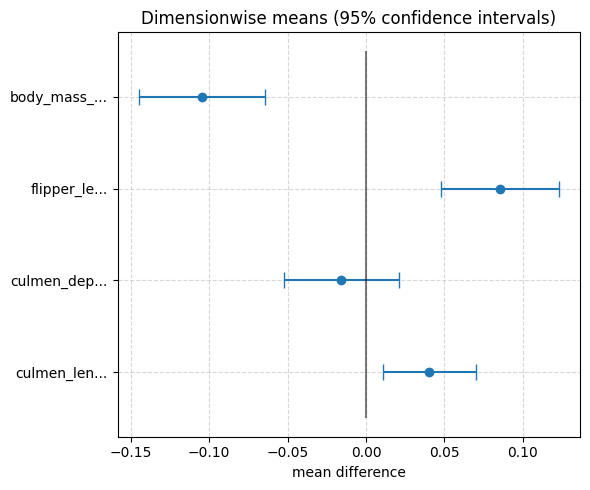

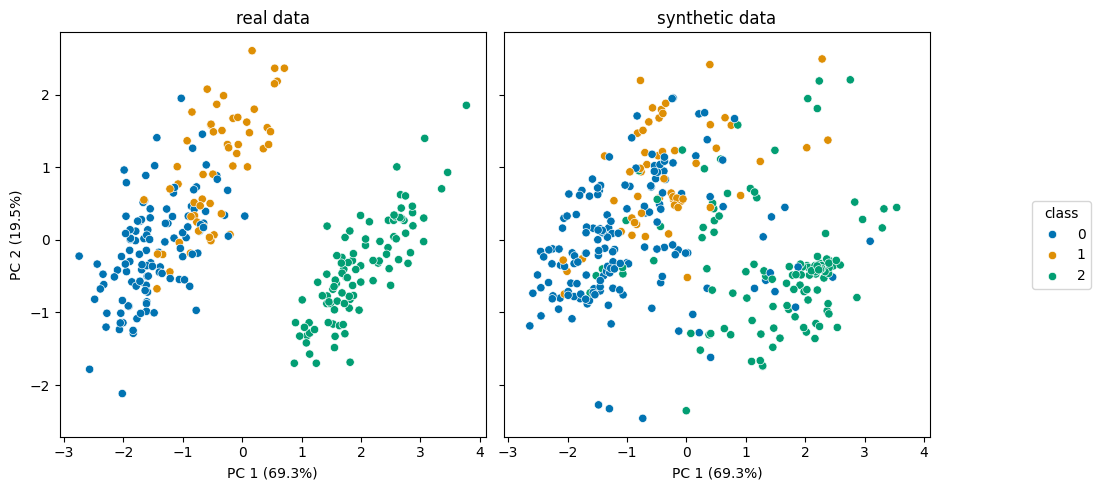

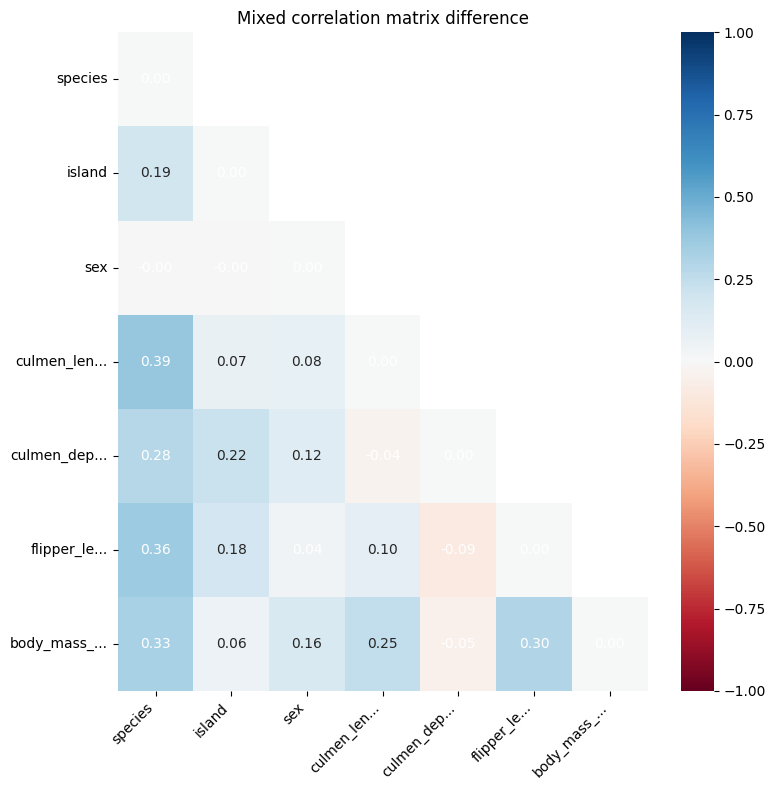

In [15]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(state_7_real_eval,target,"full_eval")

In [73]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_state_on_real = S.evaluate(state_7_real_eval,target,"full_eval")
res_state_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.061481  0.009253  0.938519  0.009253
1    pca_eigval_diff   u  0.120303       NaN  0.879697       NaN
2     pca_eigvec_ang   u  0.059957       NaN  0.980915       NaN
3            avg_cio   u  0.102513  0.102513  0.102513  0.102513
4      corr_mat_diff   u  1.277408       NaN  0.939171       NaN
5    mutual_inf_diff   u  0.714431       NaN  0.965979       NaN
6        ks_tvd_stat   u  0.163089  0.033659  0.836911  0.033659
7       frac_ks_sigs   u  0.714286       NaN  0.285714       NaN
8         avg_h_dist   u  0.030604  0.015907  0.969396  0.015907
9           avg_pMSE   u  0.052404  0.002901  0.790385  0.011602
10          avg_nndr   p  0.856518  0.007751  0.856518  0.007751
11    priv_loss_nndr   p -0.012390  0.017445  0.987610  0.007751
12              nnaa   u  0.855856  0.000000  0.144144  0.000000
13    priv_loss_nnaa   p -0.135209  0.006307  0.864791  0.006307
14       cls_F1_diff   u  0.119899  0.017987  0.880101  0.017987
15  cls_F1_diff_hout   u  0.160448  0.046154  0.839552  0.046154
16        median_DCR   p  2.694152       NaN  0.990902       NaN
17          hit_rate   p  0.011236       NaN  0.988764       NaN
18  eps_identif_risk   p  0.153558       NaN  0.846442       NaN
19      mia_cls_risk   p  0.894118  0.039019  0.105882  0.039019
20    att_discl_risk   p  0.437981  0.130158  0.562019  0.130158

Up the synth gen size a bit, still based on stack_7

In [17]:
stack_7_state.Generate(count=700).Save(name="state_7_real_eval_bigger.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
0         Gentoo      Dream              40.3             19.0   
1      Chinstrap      Dream              46.5             17.3   
2         Gentoo     Biscoe              41.1             15.1   
3         Adelie  Torgersen              41.1             20.6   
4      Chinstrap      Dream              43.5             18.7   
...          ...        ...               ...              ...   
34196     Adelie      Dream              38.3             18.2   
34197  Chinstrap  Torgersen              46.4             17.0   
34198     Gentoo     Biscoe              47.5             15.1   
34199     Adelie     Biscoe              35.3             17.8   
34200     Adelie      Dream              35.5             18.4   

       flipper_length_mm  body_mass_g     sex  
0                  209.8       5836.0  FEMALE  
1                  187.1       4288.5  FEMALE  
2                  210.6       6101.6    MALE  
3   

In [18]:
# Read state_7_real_eval_bigger
state_7_real_eval_bigger = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\state_7_real_eval_bigger.csv").round(1)

# Remove first col
state_7_real_eval_bigger = state_7_real_eval_bigger.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:04<00:02,  2.43it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0627  0.0081   |
| PCA difference in eigenvalues (exp. var.):   0.1152           |
| PCA angle between eigenvectors (radians) :   0.0885           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   1.1804           |
| Pairwise mutual information difference   :   0.8282           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1590  0.0377   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2279  0.0314   |
|       -> avg. Total Variation Distance   :   0.0672  0.0250   |
|   -> average combined p-val

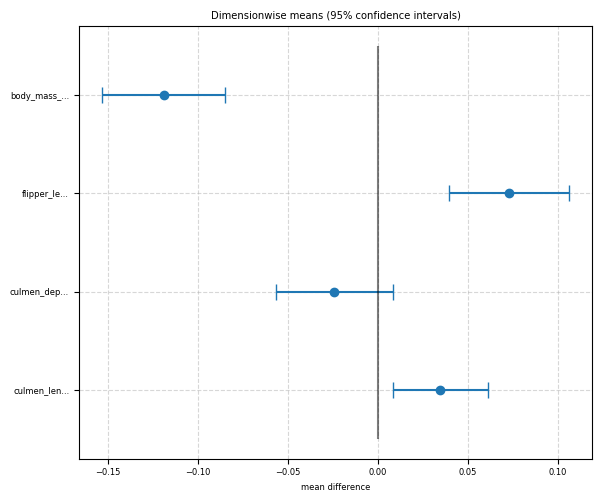

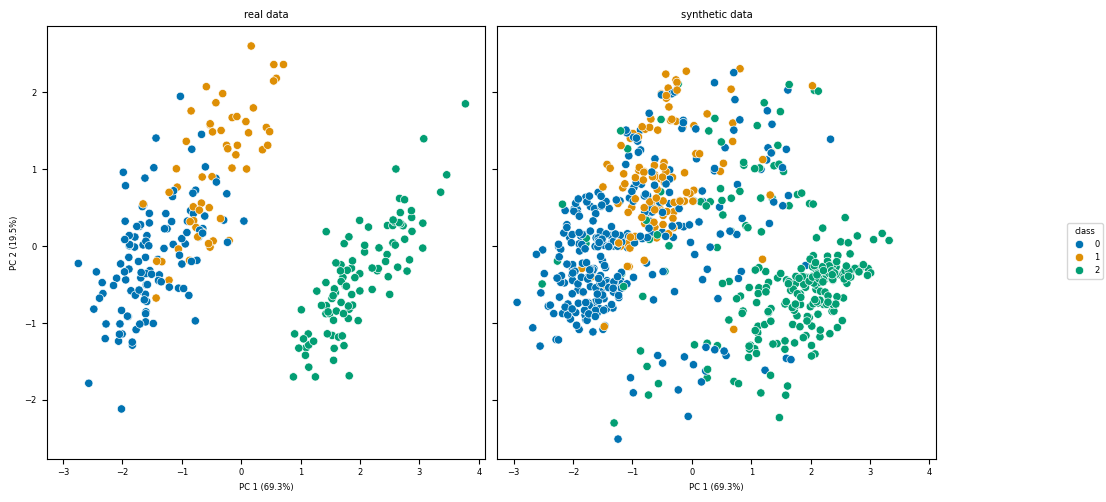

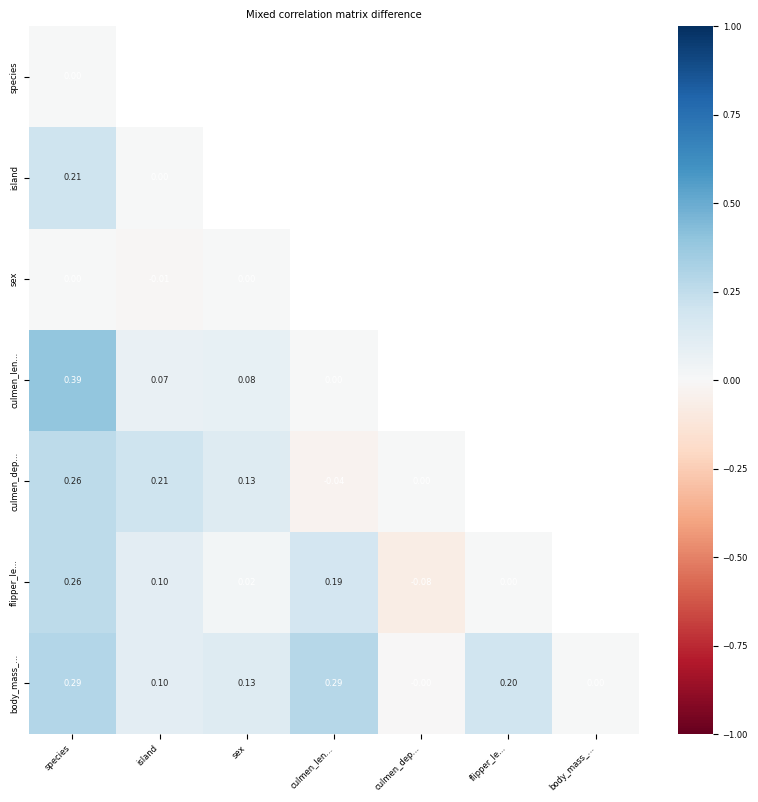

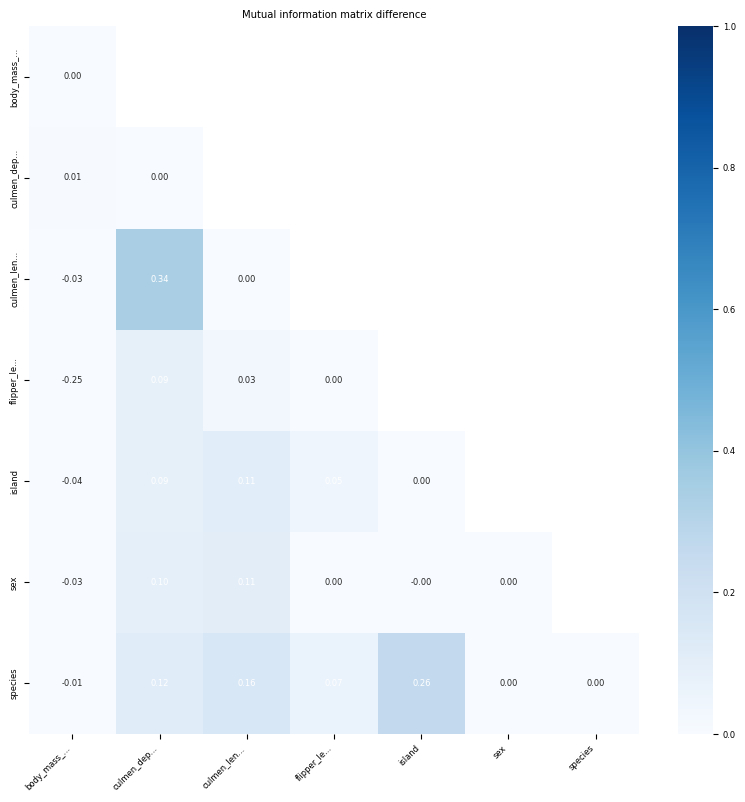

In [19]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(state_7_real_eval_bigger,target,"full_eval")

In [20]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res = S.evaluate(state_7_real_eval_bigger,target,"full_eval")
res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.062653  0.008087  0.937347  0.008087
1    pca_eigval_diff   u  0.115157       NaN  0.884843       NaN
2     pca_eigvec_ang   u  0.088491       NaN  0.971832       NaN
3            avg_cio   u  0.000000  0.000000  0.000000  0.000000
4      corr_mat_diff   u  1.180411       NaN  0.943790       NaN
5    mutual_inf_diff   u  0.828216       NaN  0.960561       NaN
6        ks_tvd_stat   u  0.159012  0.037739  0.840988  0.037739
7       frac_ks_sigs   u  0.714286       NaN  0.285714       NaN
8         avg_h_dist   u  0.025390  0.013245  0.974610  0.013245
9           avg_pMSE   u  0.044888  0.003662  0.820449  0.014649
10          avg_nndr   p  0.840755  0.008362  0.840755  0.008362
11    priv_loss_nndr   p -0.010508  0.020891  0.989492  0.008362
12              nnaa   u  0.866167  0.001768  0.133833  0.001768
13    priv_loss_nnaa   p -0.110943  0.006175  0.889057  0.006175
14       cls_F1_diff   u  0.135919  0.016151  0.864081  0.016151
15  cls_F1_diff_hout   u  0.182836  0.037251  0.817164  0.037251
16        median_DCR   p  2.652787       NaN  0.990121       NaN
17          hit_rate   p  0.003745       NaN  0.996255       NaN
18  eps_identif_risk   p  0.187266       NaN  0.812734       NaN
19      mia_cls_risk   p  0.929412  0.017647  0.070588  0.017647
20    att_discl_risk   p  0.427288  0.123579  0.572712  0.123579

Generate a synth set of size penguins_real based on full_syn_state

In [21]:
gen_count = penguins_real.shape[0]

ctgan_full_syn_state.Generate(count=gen_count).Save(name="full_syn_real_eval.csv", key="synth")

[{'train':          species  island  culmen_length_mm  culmen_depth_mm  \
0         Gentoo  Biscoe              46.7             17.5   
1         Gentoo  Biscoe              43.7             19.8   
2         Adelie   Dream              40.6             17.7   
3         Gentoo  Biscoe              46.0             14.3   
4      Chinstrap   Dream              34.2             17.4   
...          ...     ...               ...              ...   
33929  Chinstrap   Dream              47.6             18.7   
33930     Gentoo  Biscoe              47.0             14.6   
33931  Chinstrap   Dream              51.3             18.8   
33932     Gentoo  Biscoe              45.9             15.1   
33933     Adelie  Biscoe              40.0             18.7   

       flipper_length_mm  body_mass_g     sex  
0                  214.8       3567.6    MALE  
1                  213.9       4565.9    MALE  
2                  188.2       3734.5  FEMALE  
3                  207.9       4660.5  F

In [22]:
# Read full_syn_real_eval
full_syn_real_eval = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\full_syn_real_eval.csv").round(1)

# Remove first col
full_syn_real_eval = full_syn_real_eval.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:02<00:01,  4.55it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:04<00:00,  3.64it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0659  0.0094   |
| PCA difference in eigenvalues (exp. var.):   0.1636           |
| PCA angle between eigenvectors (radians) :   0.0652           |
| Average confidence interval overlap      :   0.1243  0.1036   |
|   -> # non-overlapping COIs at 95%       :    2               |
|   -> fraction of non-overlapping CIs     :   0.5000           |
| Mixed correlation matrix difference      :   1.3517           |
| Pairwise mutual information difference   :   0.6906           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1393  0.0522   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2176  0.0688   |
|       -> avg. Total Variation Distance   :   0.0349  0.0079   |
|   -> average combined p-val

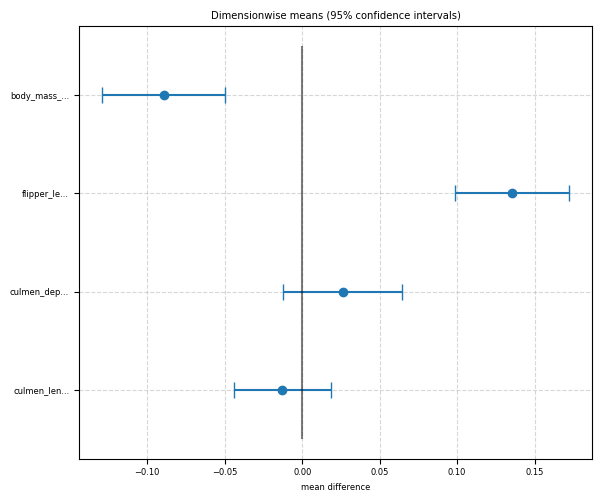

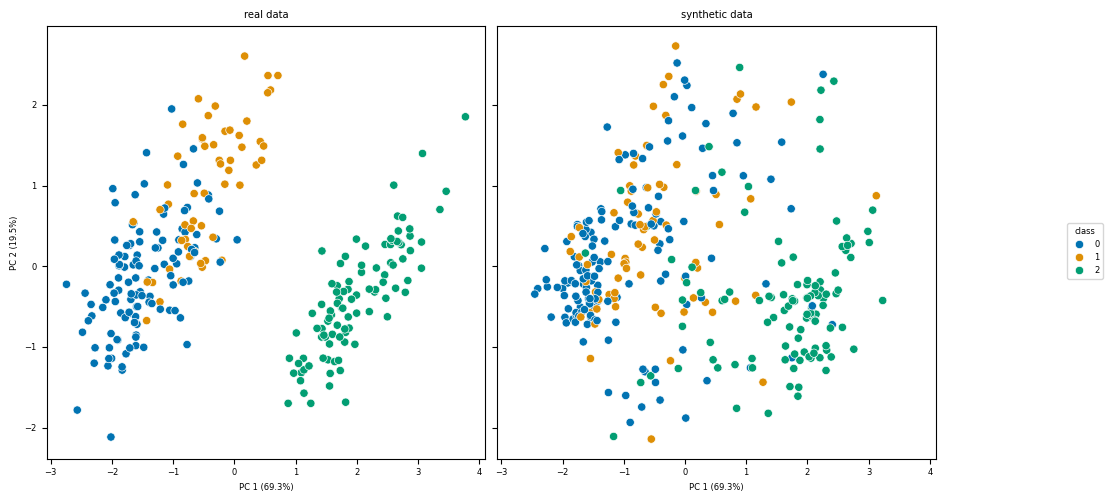

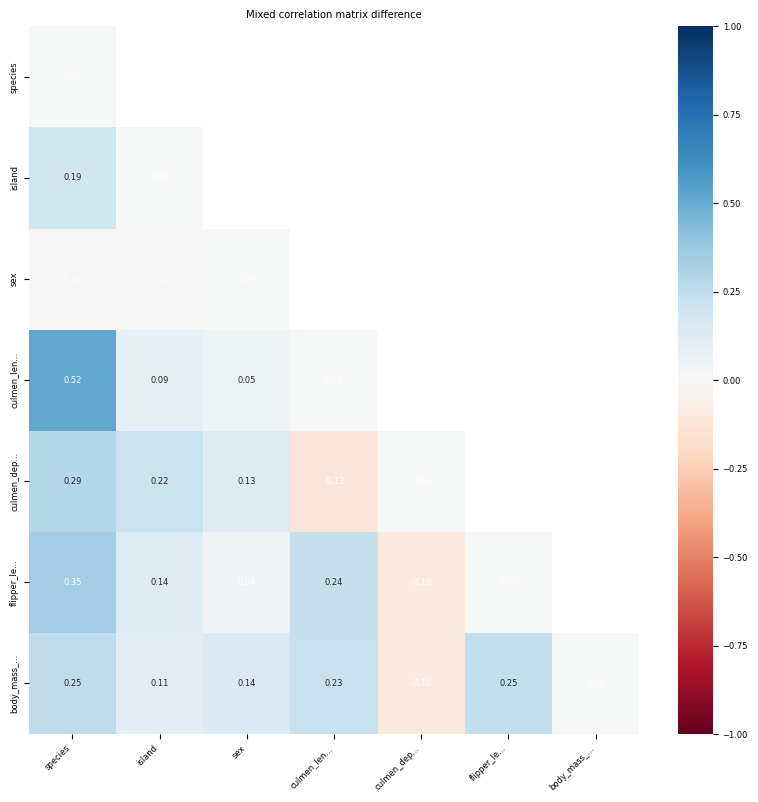

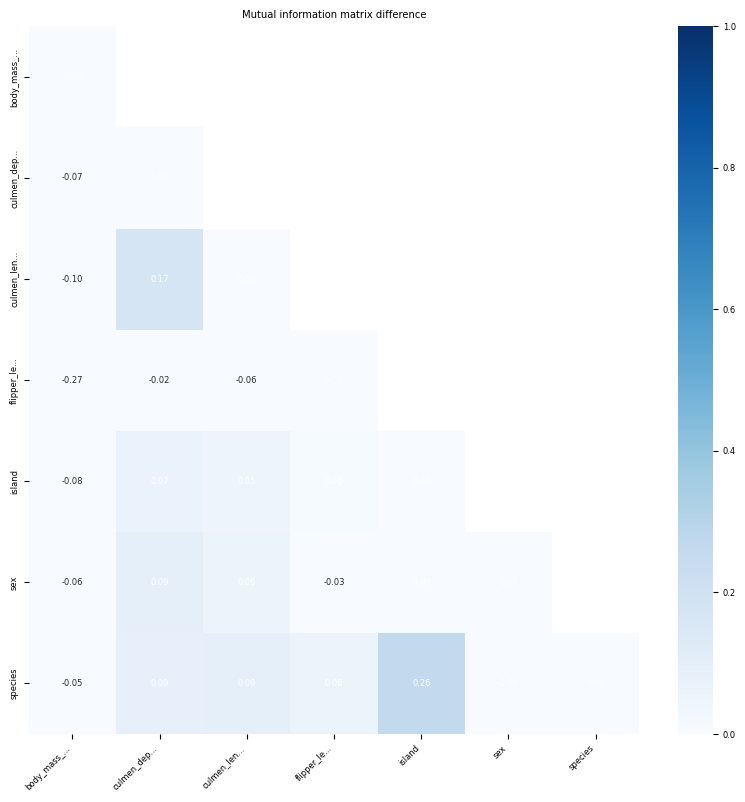

In [23]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(full_syn_real_eval,target,"full_eval")

In [74]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_full_syn_on_real = S.evaluate(full_syn_real_eval,target,"full_eval")
res_full_syn_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.065871  0.009366  0.934129  0.009366
1    pca_eigval_diff   u  0.163574       NaN  0.836426       NaN
2     pca_eigvec_ang   u  0.065204       NaN  0.979245       NaN
3            avg_cio   u  0.124263  0.103638  0.124263  0.103638
4      corr_mat_diff   u  1.351670       NaN  0.935635       NaN
5    mutual_inf_diff   u  0.690565       NaN  0.967116       NaN
6        ks_tvd_stat   u  0.139307  0.052189  0.860693  0.052189
7       frac_ks_sigs   u  0.428571       NaN  0.571429       NaN
8         avg_h_dist   u  0.012328  0.005926  0.987672  0.005926
9           avg_pMSE   u  0.085165  0.003213  0.659340  0.012853
10          avg_nndr   p  0.834206  0.009001  0.834206  0.009001
11    priv_loss_nndr   p  0.022504  0.017403  0.977496  0.009001
12              nnaa   u  0.875334  0.000000  0.124666  0.000000
13    priv_loss_nnaa   p -0.178070  0.005654  0.821930  0.005654
14       cls_F1_diff   u  0.081621  0.018883  0.918379  0.018883
15  cls_F1_diff_hout   u  0.082090  0.027588  0.917910  0.027588
16        median_DCR   p  2.654459       NaN  0.990154       NaN
17          hit_rate   p  0.014981       NaN  0.985019       NaN
18  eps_identif_risk   p  0.108614       NaN  0.891386       NaN
19      mia_cls_risk   p  0.882353  0.018602  0.117647  0.018602
20    att_discl_risk   p  0.432849  0.123166  0.567151  0.123166

Up the synth gen size a bit, still based on full_syn_state

In [25]:
ctgan_full_syn_state.Generate(count=700).Save(name="full_syn_real_eval_bigger.csv", key="synth")

[{'train':          species  island  culmen_length_mm  culmen_depth_mm  \
0         Gentoo  Biscoe              46.7             17.5   
1         Gentoo  Biscoe              43.7             19.8   
2         Adelie   Dream              40.6             17.7   
3         Gentoo  Biscoe              46.0             14.3   
4      Chinstrap   Dream              34.2             17.4   
...          ...     ...               ...              ...   
33929  Chinstrap   Dream              47.6             18.7   
33930     Gentoo  Biscoe              47.0             14.6   
33931  Chinstrap   Dream              51.3             18.8   
33932     Gentoo  Biscoe              45.9             15.1   
33933     Adelie  Biscoe              40.0             18.7   

       flipper_length_mm  body_mass_g     sex  
0                  214.8       3567.6    MALE  
1                  213.9       4565.9    MALE  
2                  188.2       3734.5  FEMALE  
3                  207.9       4660.5  F

In [26]:
# Read full_syn_real_eval_bigger
full_syn_real_eval_bigger = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\full_syn_real_eval_bigger.csv").round(1)

# Remove first col
full_syn_real_eval_bigger = full_syn_real_eval_bigger.iloc[:, 1:]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:03<00:02,  3.09it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0642  0.0081   |
| PCA difference in eigenvalues (exp. var.):   0.1100           |
| PCA angle between eigenvectors (radians) :   0.0941           |
| Average confidence interval overlap      :   0.0413  0.0413   |
|   -> # non-overlapping COIs at 95%       :    3               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   1.2329           |
| Pairwise mutual information difference   :   0.8117           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1338  0.0486   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2177  0.0522   |
|       -> avg. Total Variation Distance   :   0.0219  0.0099   |
|   -> average combined p-val

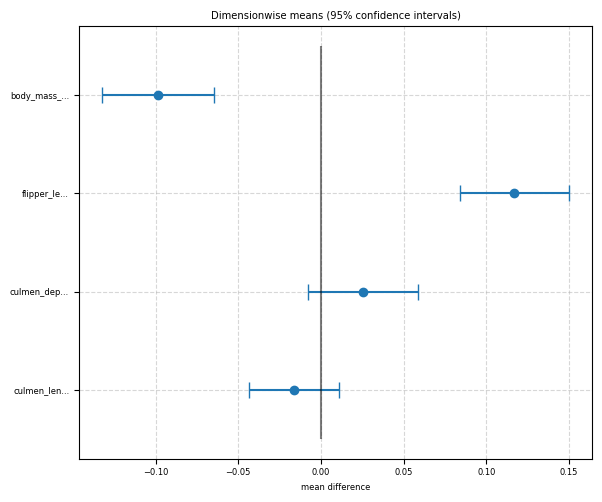

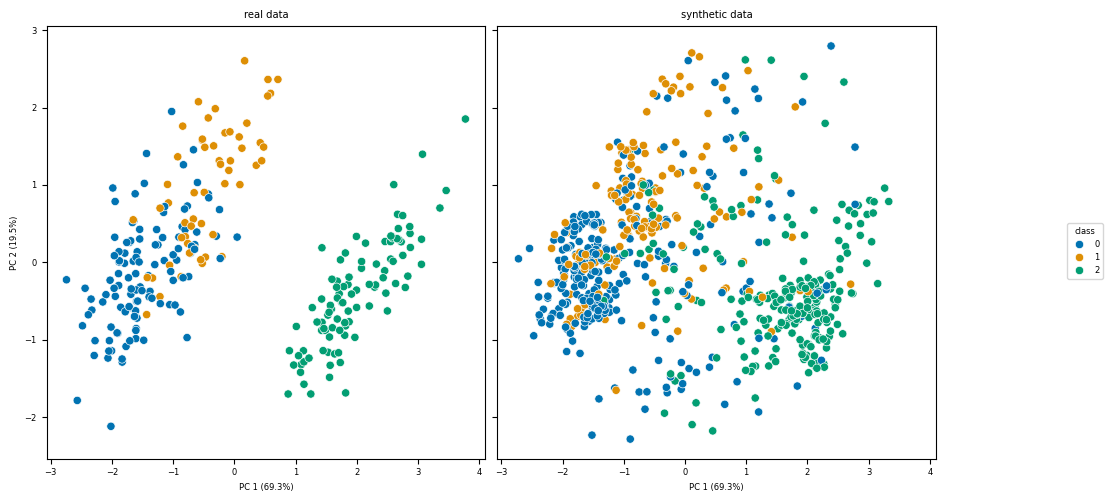

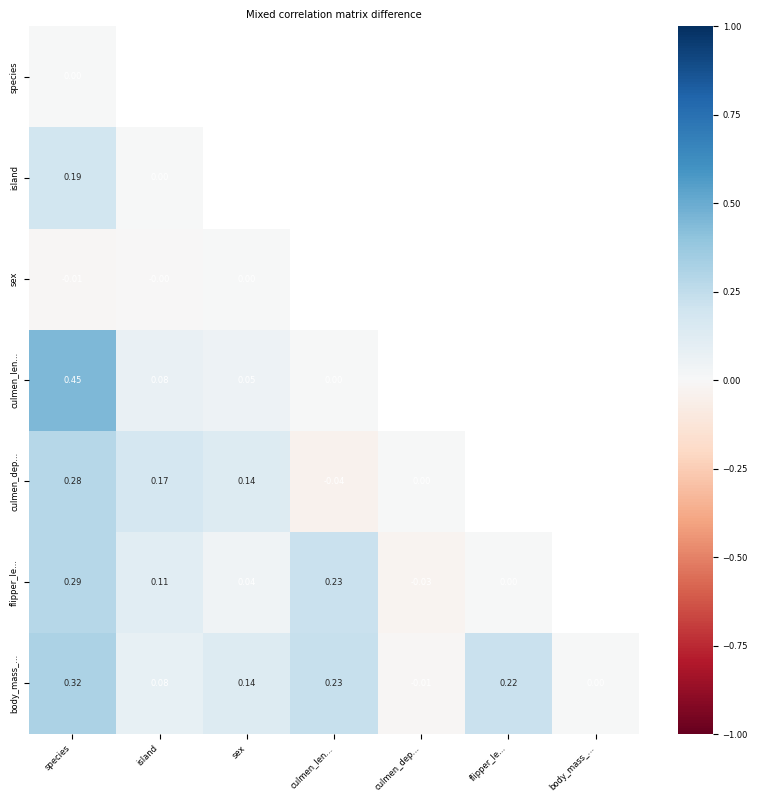

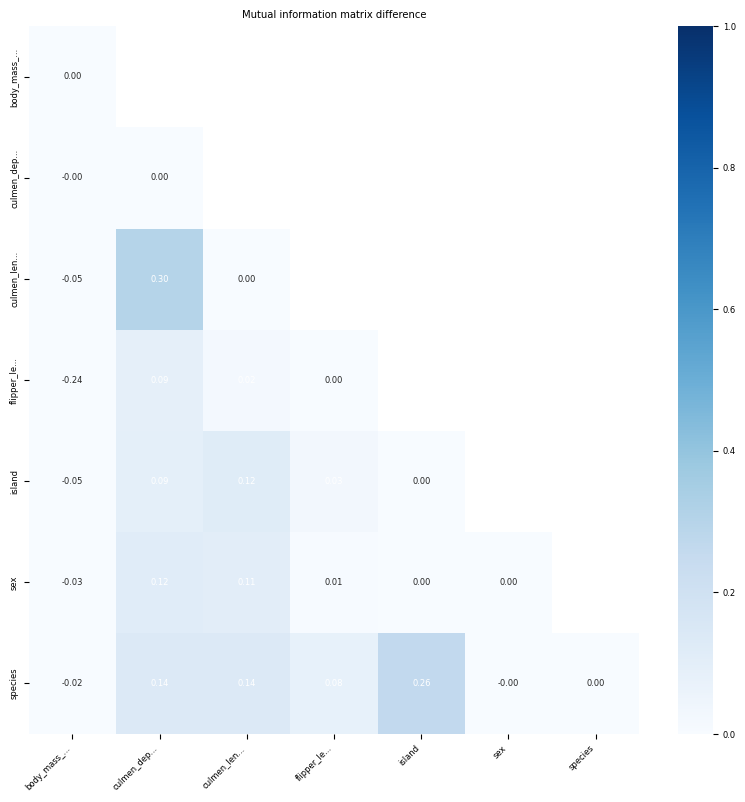

In [27]:
# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test)
_ = S.evaluate(full_syn_real_eval_bigger,target,"full_eval")

In [40]:
# Evaluate 
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res = S.evaluate(full_syn_real_eval_bigger,target,"full_eval")
res

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


metric dim       val       err     n_val     n_err
0       avg_dwm_diff   u  0.064250  0.008133  0.935750  0.008133
1    pca_eigval_diff   u  0.110025       NaN  0.889975       NaN
2     pca_eigvec_ang   u  0.094080       NaN  0.970053       NaN
3            avg_cio   u  0.041291  0.041291  0.041291  0.041291
4      corr_mat_diff   u  1.232865       NaN  0.941292       NaN
5    mutual_inf_diff   u  0.811653       NaN  0.961350       NaN
6        ks_tvd_stat   u  0.133789  0.048578  0.866211  0.048578
7       frac_ks_sigs   u  0.571429       NaN  0.428571       NaN
8         avg_h_dist   u  0.104038  0.093326  0.895962  0.093326
9           avg_pMSE   u  0.053529  0.004475  0.785884  0.017900
10          avg_nndr   p  0.852232  0.007885  0.852232  0.007885
11    priv_loss_nndr   p -0.006567  0.016794  0.993433  0.007885
12              nnaa   u  0.848627  0.002266  0.151373  0.002266
13    priv_loss_nnaa   p -0.136935  0.008555  0.863065  0.008555
14       cls_F1_diff   u  0.131027  0.019033  0.868973  0.019033
15  cls_F1_diff_hout   u  0.111940  0.049314  0.888060  0.049314
16        median_DCR   p  2.510758       NaN  0.986897       NaN
17          hit_rate   p  0.033708       NaN  0.966292       NaN
18  eps_identif_risk   p  0.254682       NaN  0.745318       NaN
19      mia_cls_risk   p  0.917647  0.017150  0.082353  0.017150
20    att_discl_risk   p  0.458939  0.119781  0.541061  0.119781

In [51]:
results = pd.DataFrame(columns=["hit_rate", "f1_diff"])
evals = res.set_index("metric")
results.loc["res_test"] = [evals.loc["hit_rate", "val"], evals.loc["cls_F1_diff", "val"]]
results.loc["res_test_2"] = [evals.loc["hit_rate", "val"], evals.loc["cls_F1_diff", "val"]]
results

hit_rate   f1_diff
res_test    0.037453  0.075105
res_test_2  0.037453  0.075105

In [47]:
import matplotlib.pyplot as plt

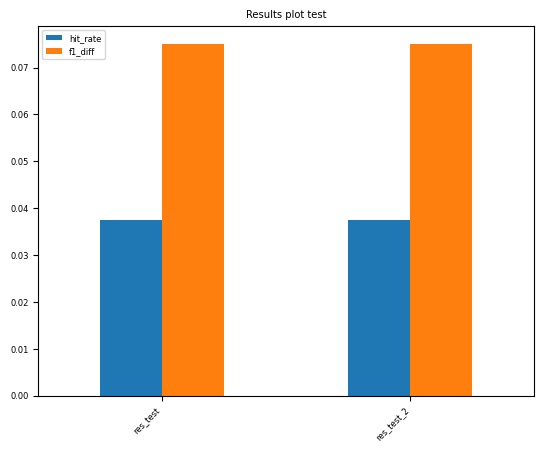

In [52]:
results.plot.bar()
plt.title("Results plot test")
plt.xticks(rotation=45, ha="right")
plt.show()

In [89]:
eval_results = [res_base, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_v6, res_state_on_real, res_full_syn_on_real]
eval_str = ["res_base", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_v6", "res_state_on_real", "res_full_syn_on_real"]

In [92]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

eps_identif_risk  att_discl_risk  hit_rate
res_base                      0.235955        0.480325  0.037453
res_stack_v1                  0.314607        0.457442  0.065543
res_stack_v2                  0.302434        0.447819  0.088951
res_stack_v3                  0.331774        0.437767  0.158166
res_stack_v4                  0.400234        0.452390  0.318830
res_stack_v5                  0.385848        0.452671  0.417895
res_stack_v6                  0.344503        0.443288  0.466608
res_state_on_real             0.153558        0.437981  0.011236
res_full_syn_on_real          0.108614        0.432849  0.014981

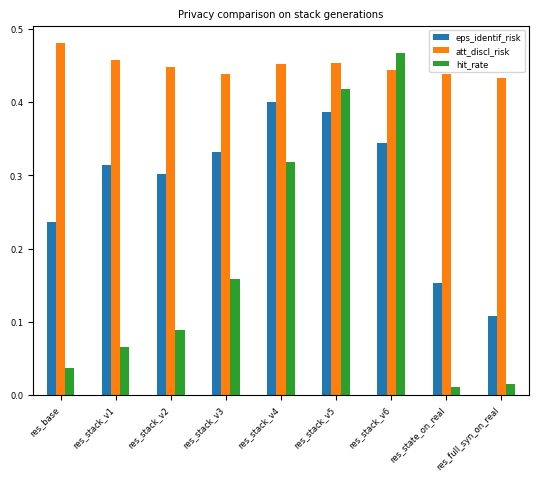

In [98]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.show()

In [94]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

avg_dwm_diff  pca_eigval_diff  pca_eigvec_ang
res_base                  0.038764         0.056347        0.065386
res_stack_v1              0.053081         0.005783        0.023803
res_stack_v2              0.047832         0.013960        0.019994
res_stack_v3              0.049681         0.031355        0.006298
res_stack_v4              0.044001         0.035509        0.022901
res_stack_v5              0.034568         0.020975        0.020147
res_stack_v6              0.023202         0.016200        0.016399
res_state_on_real         0.061481         0.120303        0.059957
res_full_syn_on_real      0.065871         0.163574        0.065204

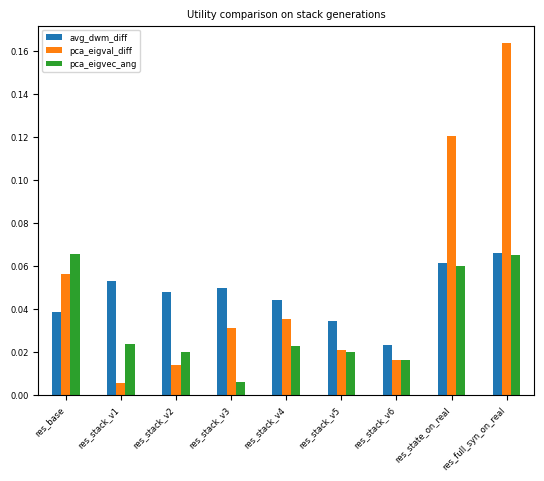

In [99]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.show()

In [100]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

corr_mat_diff  mutual_inf_diff
res_base                   0.510340         0.629546
res_stack_v1               0.452957         0.207914
res_stack_v2               0.359852         0.229886
res_stack_v3               0.295376         0.163168
res_stack_v4               0.257353         0.179089
res_stack_v5               0.164503         0.177229
res_stack_v6               0.248356         0.184598
res_state_on_real          1.277408         0.714431
res_full_syn_on_real       1.351670         0.690565

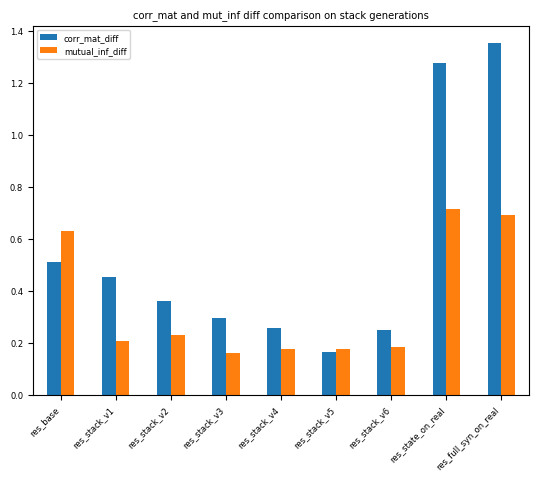

In [101]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.show()